In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import gc

from sklearn.model_selection import TimeSeriesSplit

pd.set_option('display.expand_frame_repr', False)

In [3]:
os.chdir("C:/Users/lubor.pacak/Desktop/kaggle_ashrae")  #prace

In [2]:
os.chdir("C:/Users/lpacak/Desktop/kaggle_ashrae")  #doma

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/lpacak/Desktop/kaggle_ashrae'

In [4]:
%run functions_file.py

In [5]:
building=pd.read_csv("building_metadata.csv")
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")
train = train.query('not (building_id <= 104 & meter == 0 & timestamp <= "2016-05-20")')
weather_test=pd.read_csv("weather_test.csv")
weather_train=pd.read_csv("weather_train.csv")

In [6]:
weather=pd.concat([weather_train,weather_test])

In [7]:
train=pd.merge(train,building,how='left',left_on='building_id',right_on='building_id')
test=pd.merge(test,building,how='left',left_on='building_id',right_on='building_id')

In [8]:
del building, weather_test, weather_train
gc.collect()

146

In [8]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN


add weather history

In [9]:
weather['site_rownum'] = weather.groupby(['site_id']).cumcount()

In [9]:
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [10]:
for i in [1,7,21]:
    for j in ['air_temperature','cloud_coverage','dew_temperature','wind_speed']:
        weather=compute_history(j,i,weather)
        gc.collect()

In [12]:
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,site_rownum,...,air_temperature_21,cloud_coverage_21,dew_temperature_21,precip_depth_1_hr_21,wind_speed_21,air_temperature_28,cloud_coverage_28,dew_temperature_28,precip_depth_1_hr_28,wind_speed_28
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
weather=reduce_mem_usage(weather)
train=reduce_mem_usage(train)
test=reduce_mem_usage(test)
gc.collect()

Memory usage of dataframe is 73.18 MB
Memory usage after optimization is: 21.73 MB
Decreased by 70.3%
Memory usage of dataframe is 1515.96 MB
Memory usage after optimization is: 512.02 MB
Decreased by 66.2%
Memory usage of dataframe is 3181.27 MB
Memory usage after optimization is: 1074.44 MB
Decreased by 66.2%


0

In [12]:
train=pd.merge(train,weather,how='left',left_on=['site_id','timestamp'],right_on=['site_id','timestamp'])
gc.collect()
test=pd.merge(test,weather,how='left',left_on=['site_id','timestamp'],right_on=['site_id','timestamp'])
gc.collect()

49

In [13]:
del weather
gc.collect()

41

### Target exploration

electricity


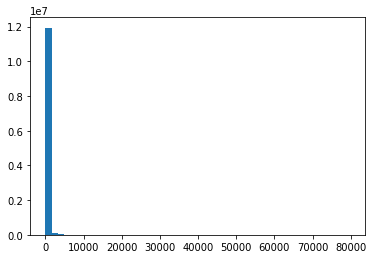

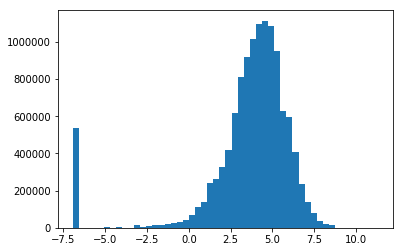

0.5965992451560884
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
hotwater


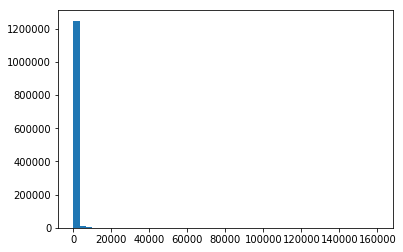

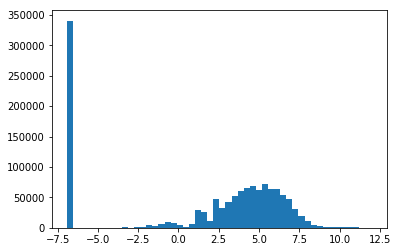

0.062526253827395
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
chilledwater


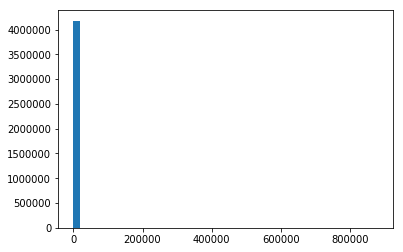

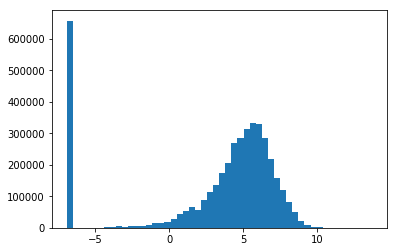

0.2068865903908271
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
steam


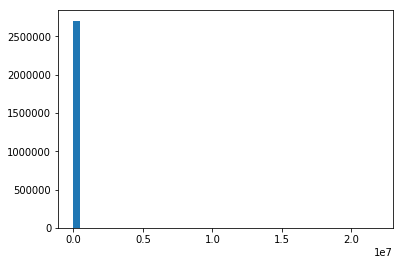

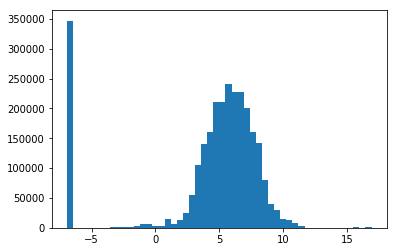

0.13398791062568943
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [13]:
for i in train['meter'].unique():
    if (i==0):
        print('electricity')
    if (i==1):
        print('chilledwater')
    if (i==2):
        print('steam')
    if (i==3):
        print('hotwater')
    plt.hist(train[train['meter']==i]['meter_reading'],50)
    plt.show()
    plt.hist(np.log(train[train['meter']==i]['meter_reading']+0.001),50)
    plt.show()
    print(train[train['meter']==i].shape[0]/train.shape[0])
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')

In [14]:
train['month']=pd.to_datetime(train['timestamp']).dt.month
train['day']=pd.to_datetime(train['timestamp']).dt.day
train['weekday']=pd.to_datetime(train['timestamp']).dt.dayofweek
train['hour']=pd.to_datetime(train['timestamp']).dt.hour

test['month']=pd.to_datetime(test['timestamp']).dt.month
test['day']=pd.to_datetime(test['timestamp']).dt.day
test['weekday']=pd.to_datetime(test['timestamp']).dt.dayofweek
test['hour']=pd.to_datetime(test['timestamp']).dt.hour

In [15]:
train['log_square_feet']=np.log1p(train['square_feet'])
test['log_square_feet']=np.log1p(test['square_feet'])

In [17]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,wind_speed_21,air_temperature_28,cloud_coverage_28,dew_temperature_28,precip_depth_1_hr_28,wind_speed_28,month,day,weekday,hour
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,4,0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,4,0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,4,0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,4,0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,4,0


meter is
electricity


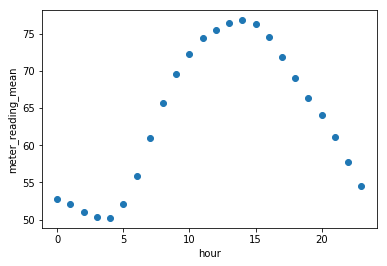

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
meter is
hotwater


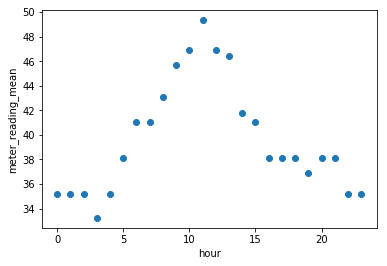

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
meter is
chilledwater


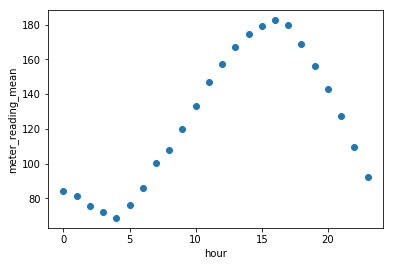

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
meter is
steam


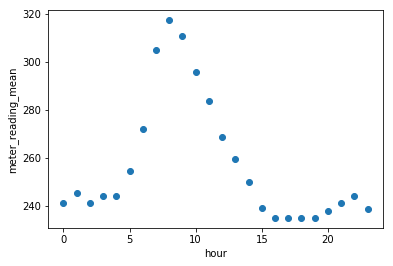

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [18]:
for j in train['meter'].unique():
    subset=train[((train['meter']==j))]
        
    print('meter is')
    if (j==0):
        print('electricity')
    if (j==1):
        print('chilledwater')
    if (j==2):
        print('steam')
    if (j==3):
        print('hotwater')
            
        
    subset = subset.groupby(['hour']).aggregate({'meter_reading':['median']})
    subset.columns=['_'.join (col) for col in list(subset)]
    subset.reset_index(inplace=True)
        
    plt.scatter('hour', 'meter_reading_median', data=subset)
    plt.xlabel('hour')
    plt.ylabel('meter_reading_mean')
    plt.show()
        
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')

In [16]:
num_preds,cat_preds=detect_types(train)

In [17]:
num_preds.remove('building_id')
num_preds.remove('meter_reading')
num_preds.remove('meter')
num_preds.remove('site_id')
num_preds.remove('month')
num_preds.remove('day')
num_preds.remove('weekday')
num_preds.remove('primary_use')

cat_preds.remove('timestamp')
cat_preds.append('meter')
cat_preds.append('building_id')
cat_preds.append('site_id')
cat_preds.append('month')
cat_preds.append('day')
cat_preds.append('weekday')
cat_preds.append('primary_use')

In [18]:
for i in cat_preds:
    train[i]=train[i].astype('category')
    test[i]=test[i].astype('category')

## Exploration of categorical variables

meter


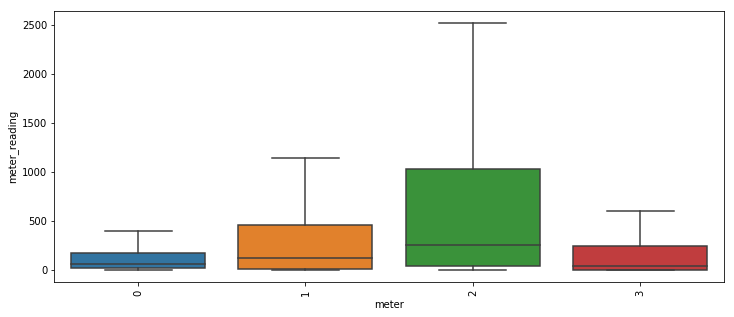

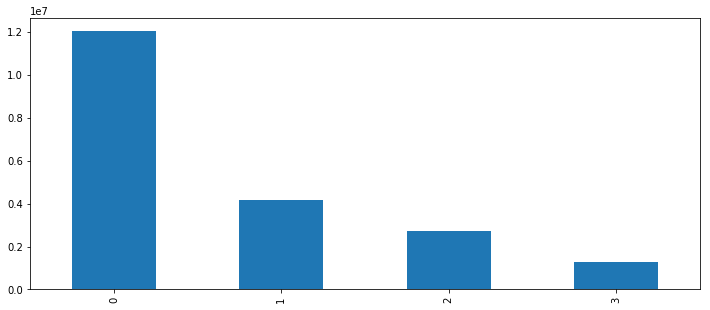

---------------------------------------------------------------------------------------------
building_id


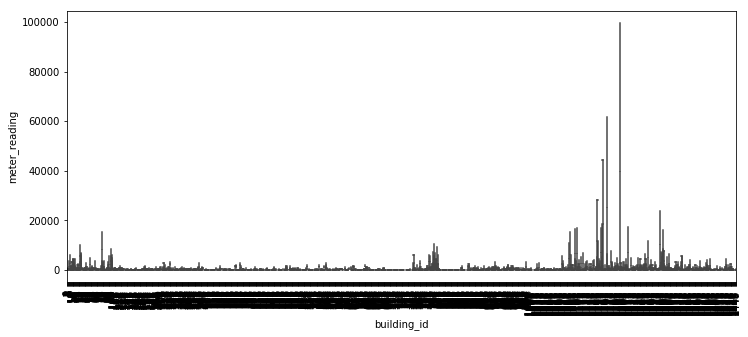

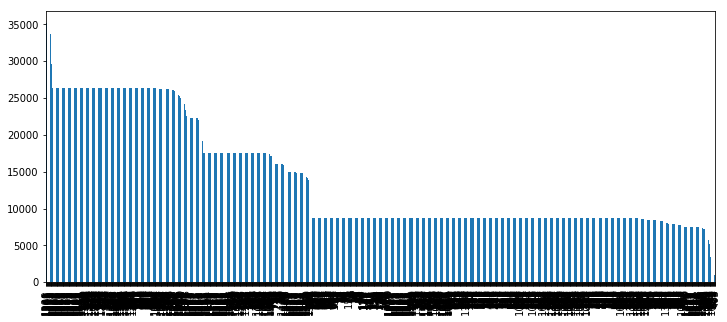

---------------------------------------------------------------------------------------------
site_id


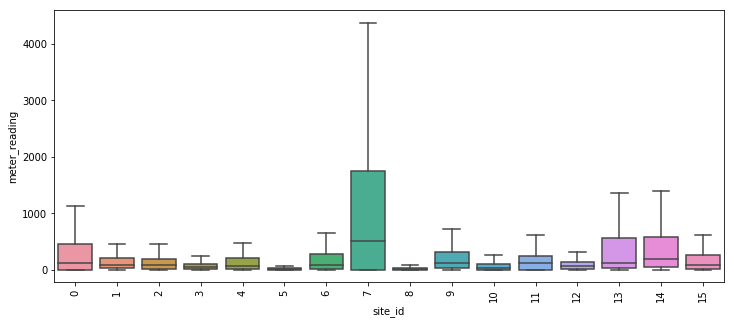

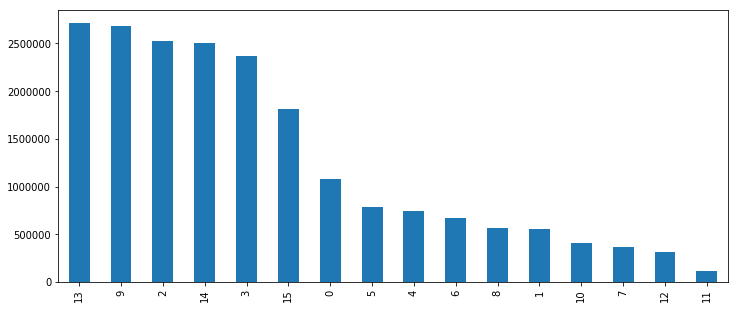

---------------------------------------------------------------------------------------------
month


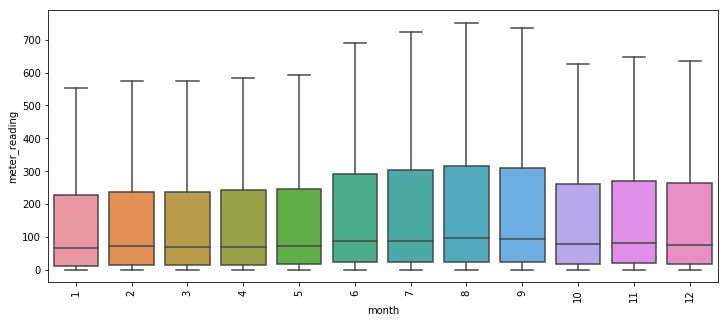

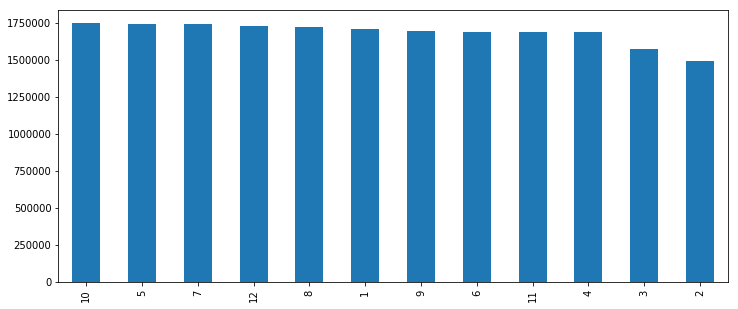

---------------------------------------------------------------------------------------------
day


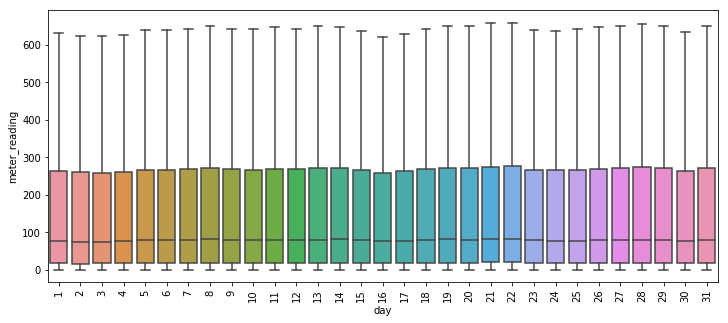

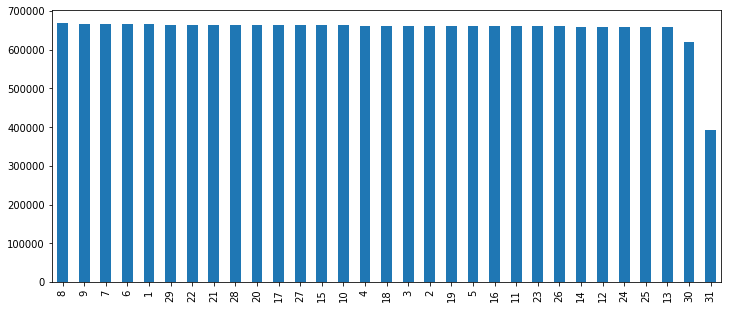

---------------------------------------------------------------------------------------------
weekday


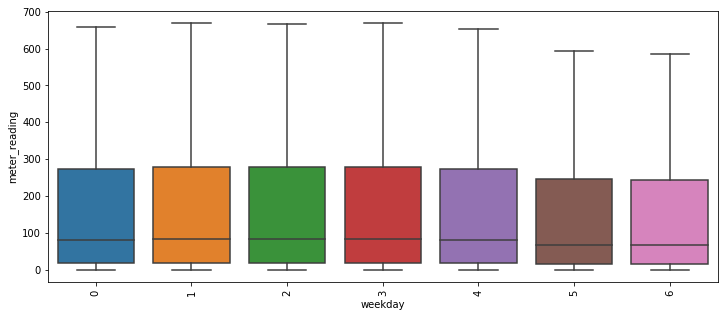

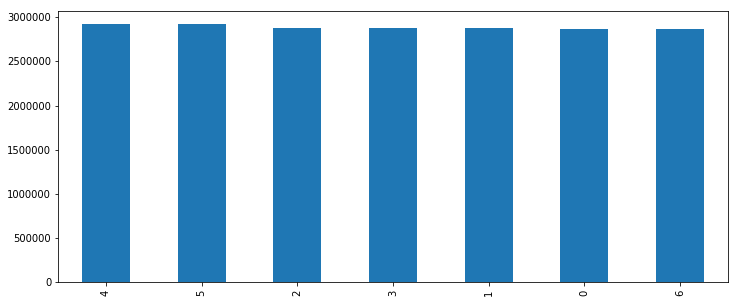

---------------------------------------------------------------------------------------------
primary_use


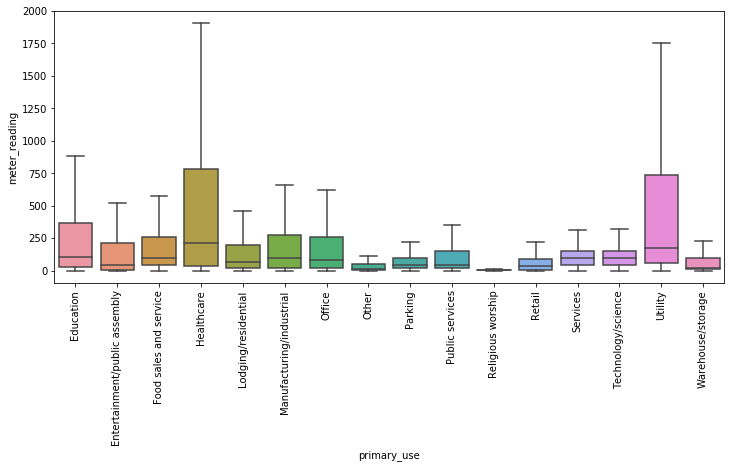

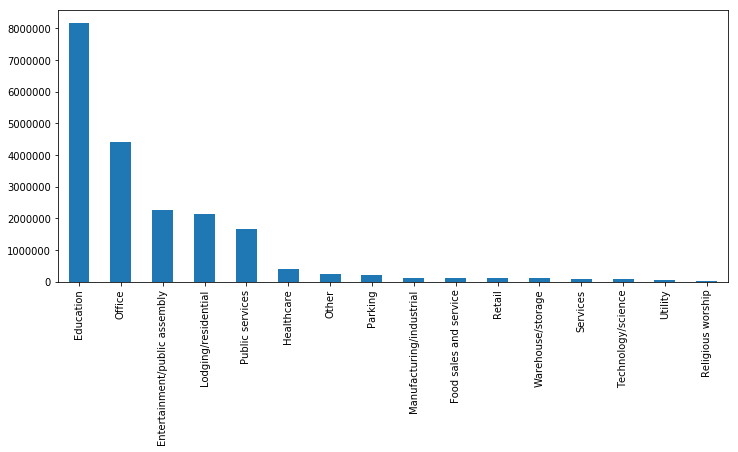

---------------------------------------------------------------------------------------------


In [27]:
for i in cat_preds:
    print(i)
    graph_exploration_continuous(train[i],train['meter_reading'])
    
    plt.figure(figsize=(12,5))
    train[i].value_counts(dropna=False).plot(kind='bar')
    plt.show()
    print('---------------------------------------------------------------------------------------------')

square_feet
SAME FREQUENCY BINNING:


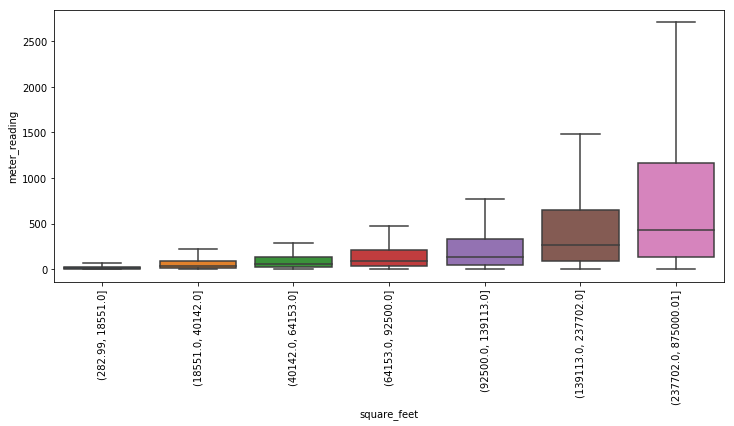

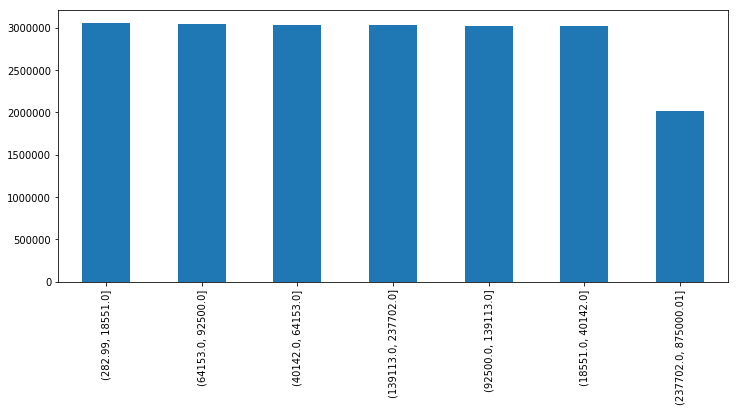

SAME DISTANCE BINNING:


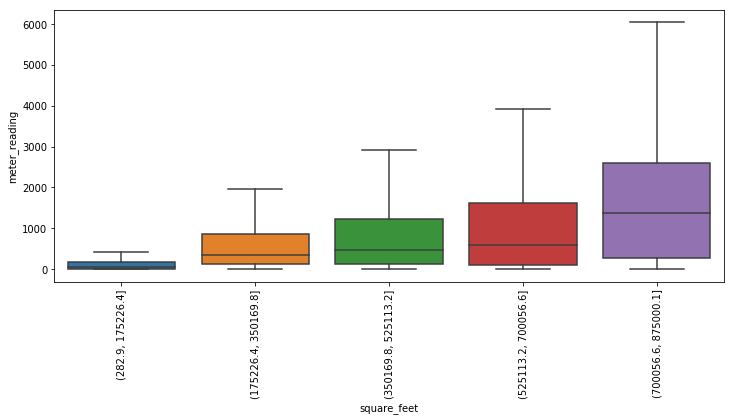

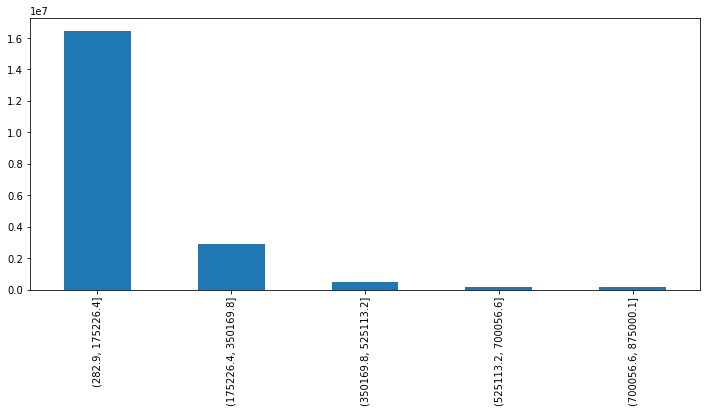

---------------------------------------------------------
---------------------------------------------------------
year_built
SAME FREQUENCY BINNING:


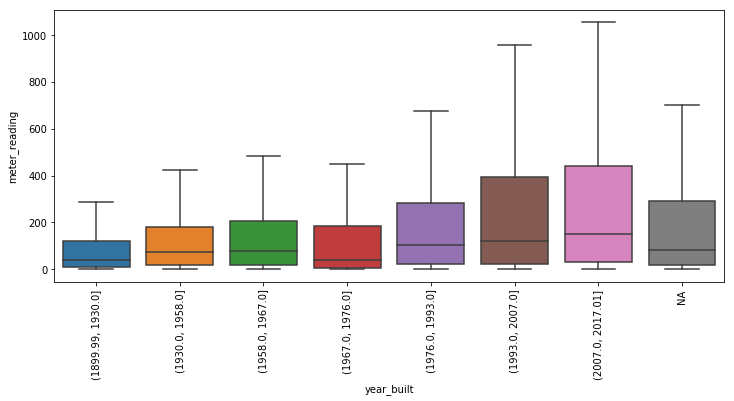

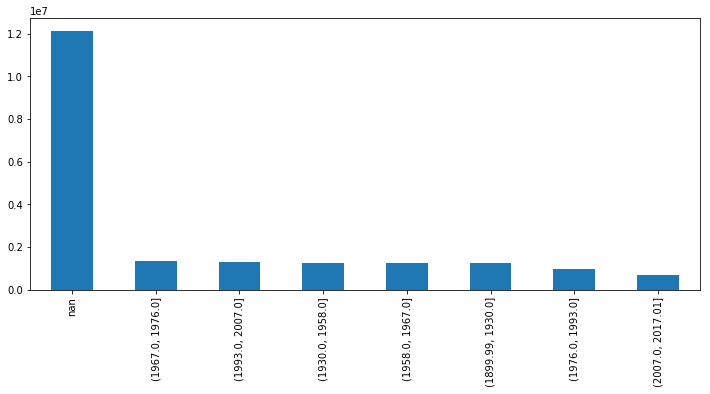

SAME DISTANCE BINNING:


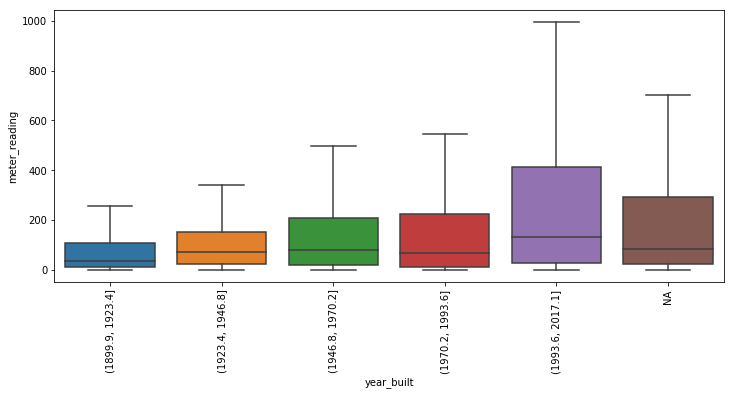

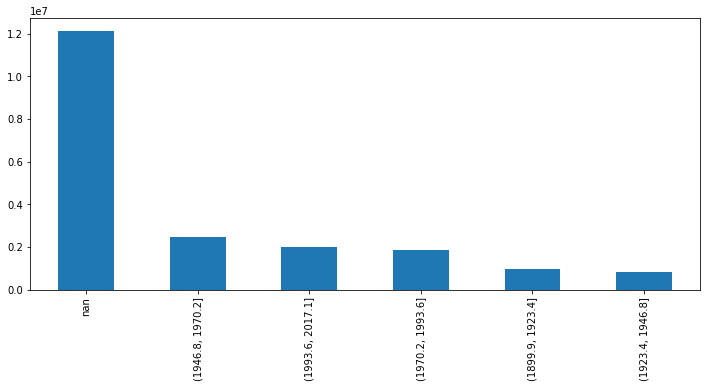

---------------------------------------------------------
---------------------------------------------------------
floor_count
SAME FREQUENCY BINNING:


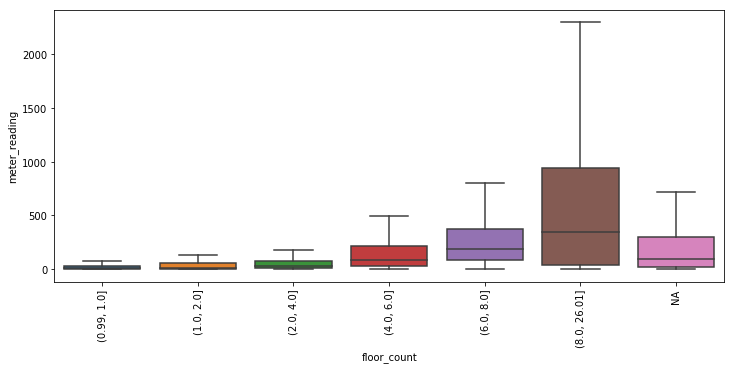

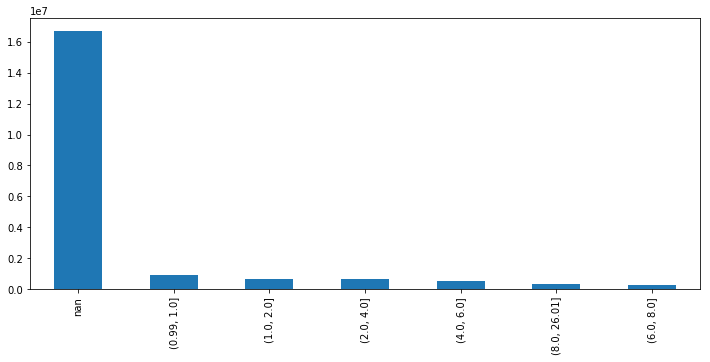

SAME DISTANCE BINNING:


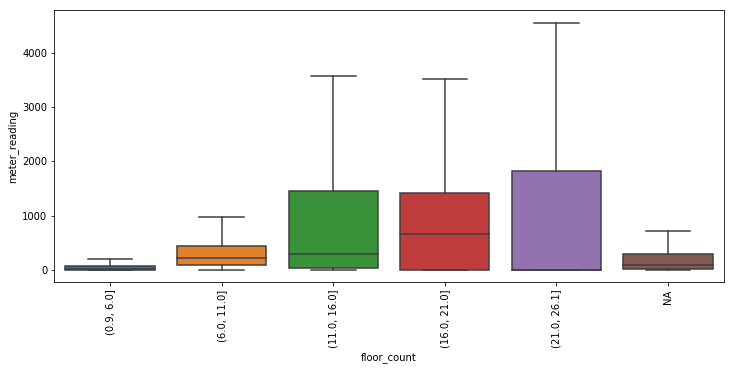

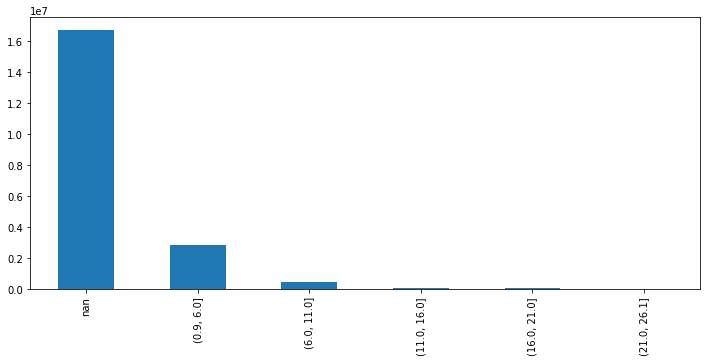

---------------------------------------------------------
---------------------------------------------------------
air_temperature
SAME FREQUENCY BINNING:


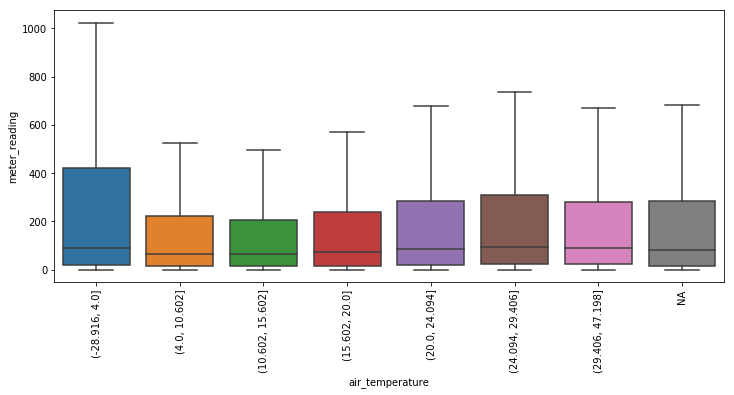

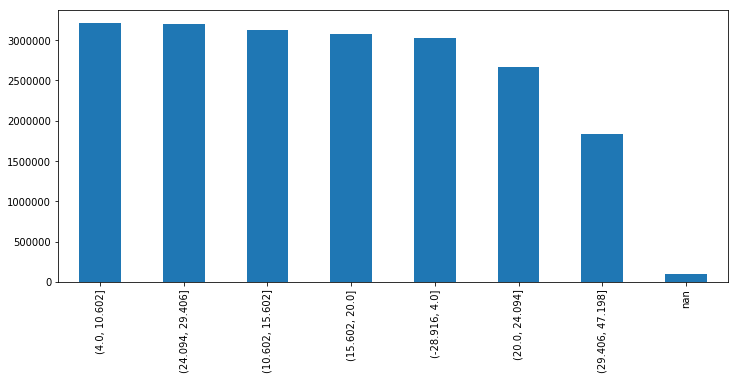

SAME DISTANCE BINNING:


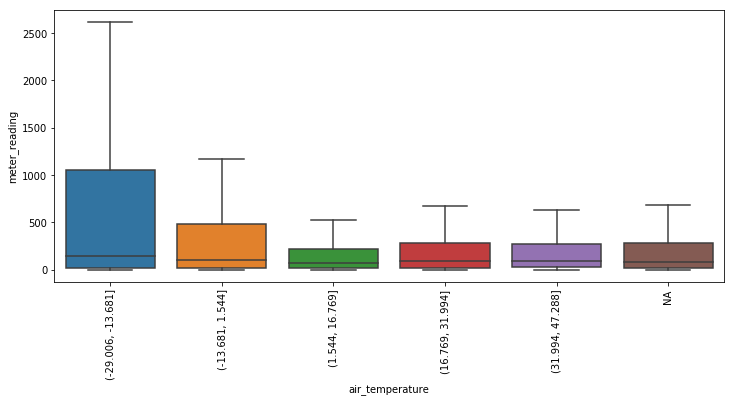

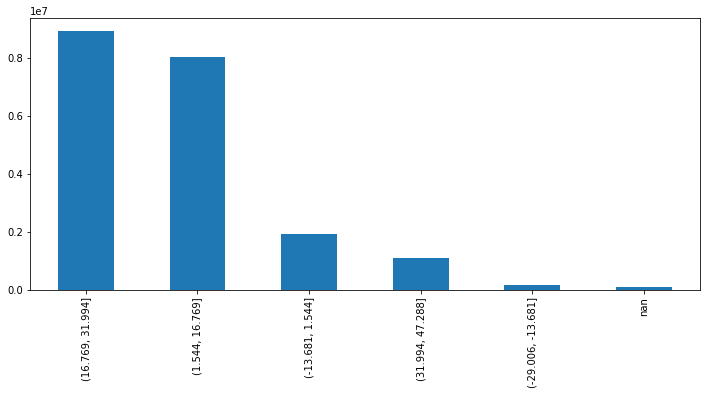

---------------------------------------------------------
---------------------------------------------------------
cloud_coverage
SAME FREQUENCY BINNING:


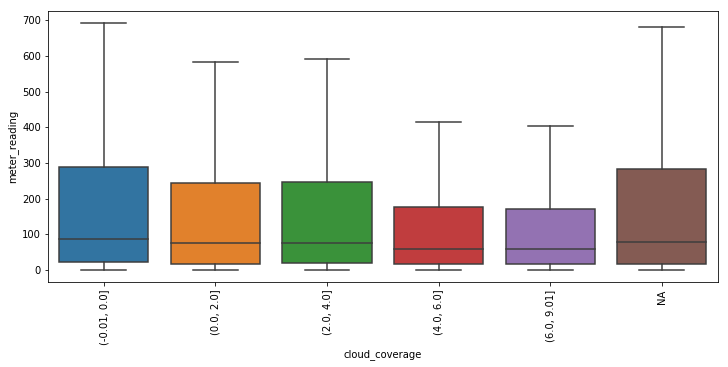

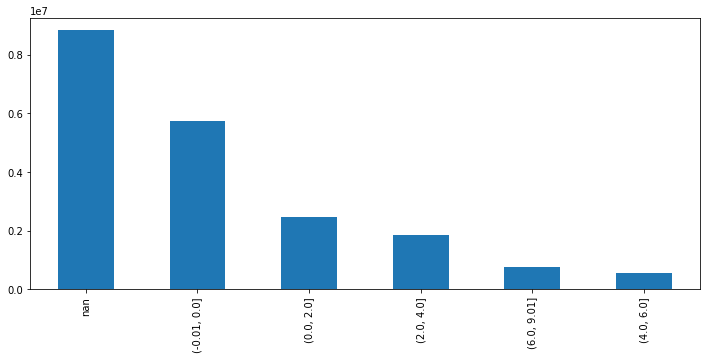

SAME DISTANCE BINNING:


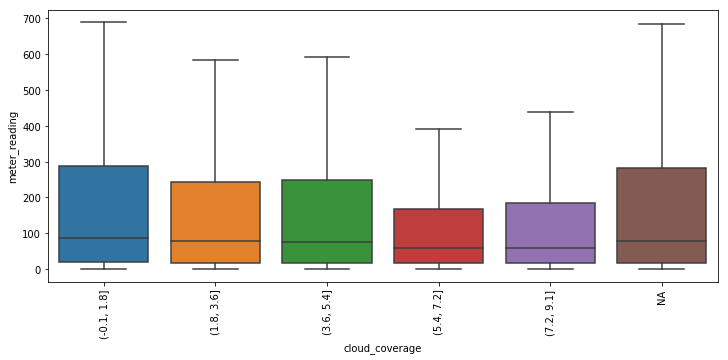

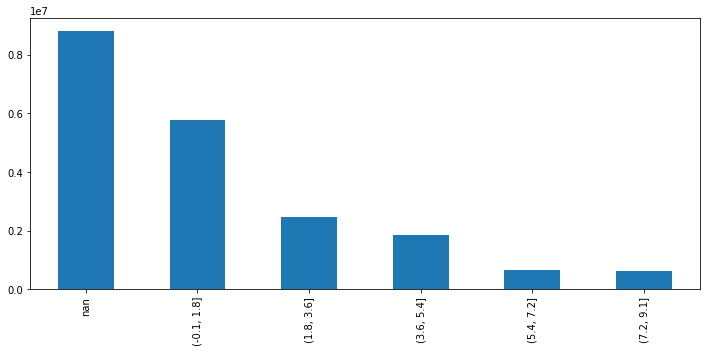

---------------------------------------------------------
---------------------------------------------------------
dew_temperature
SAME FREQUENCY BINNING:


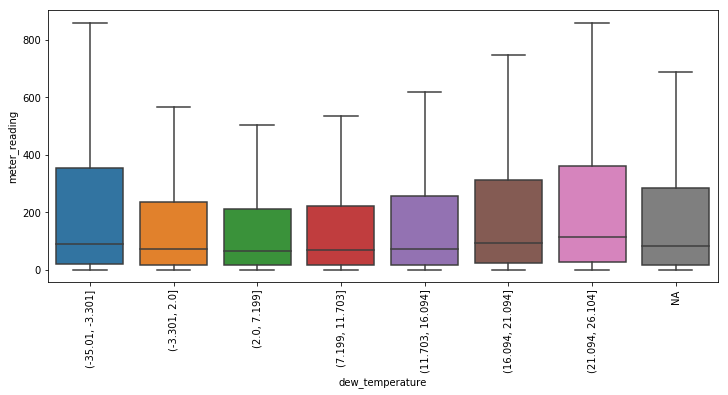

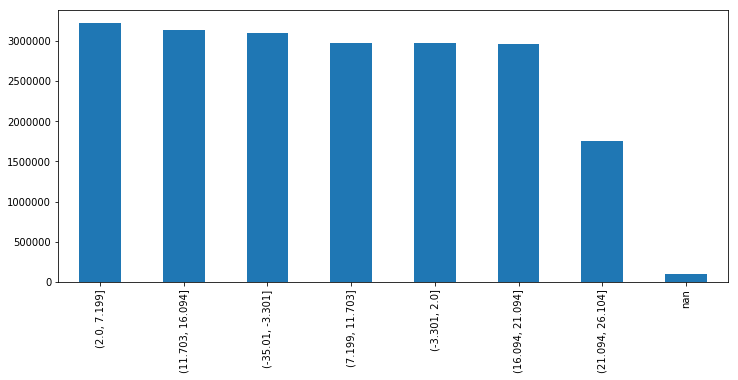

SAME DISTANCE BINNING:


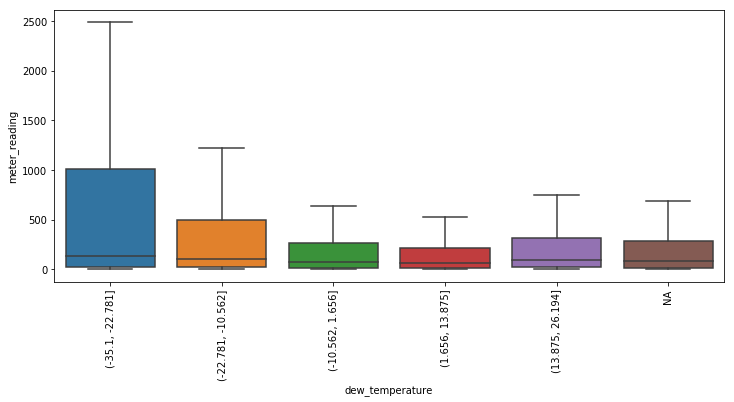

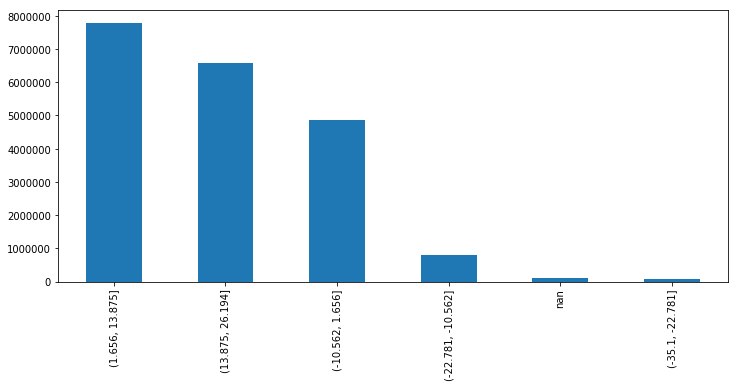

---------------------------------------------------------
---------------------------------------------------------
precip_depth_1_hr
SAME FREQUENCY BINNING:


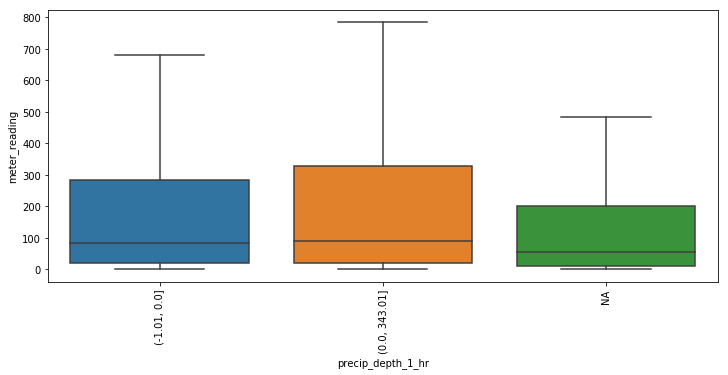

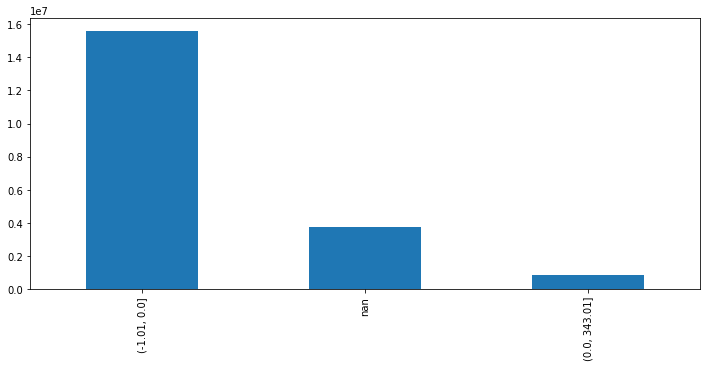

SAME DISTANCE BINNING:


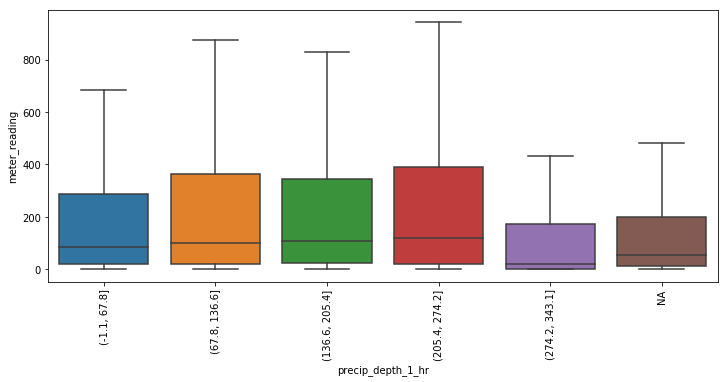

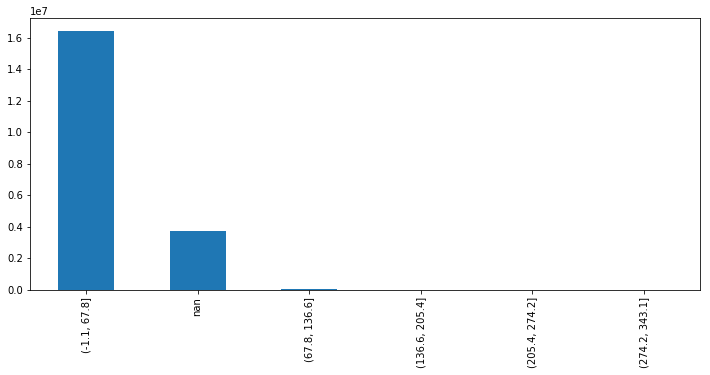

---------------------------------------------------------
---------------------------------------------------------
sea_level_pressure
SAME FREQUENCY BINNING:


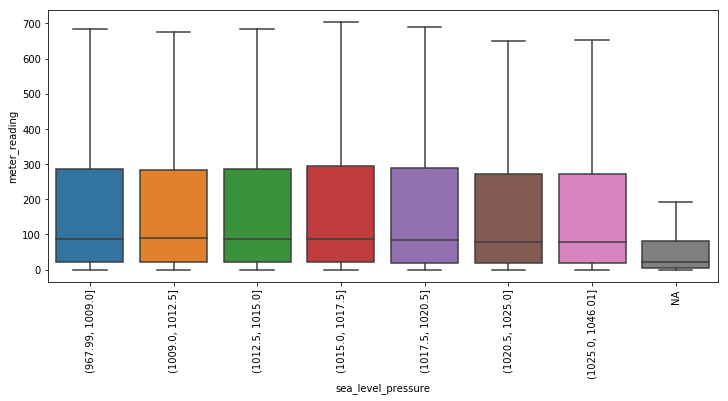

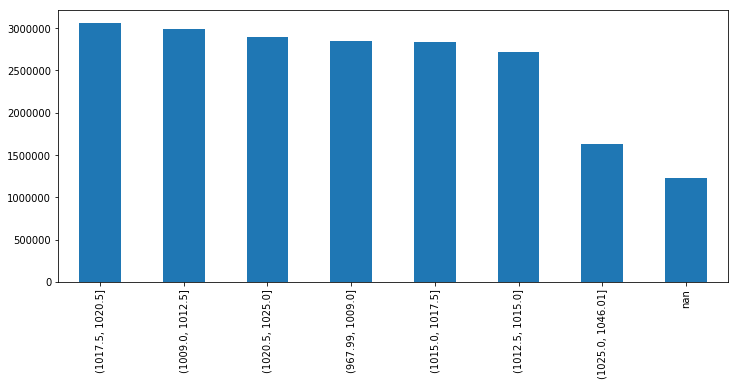

SAME DISTANCE BINNING:


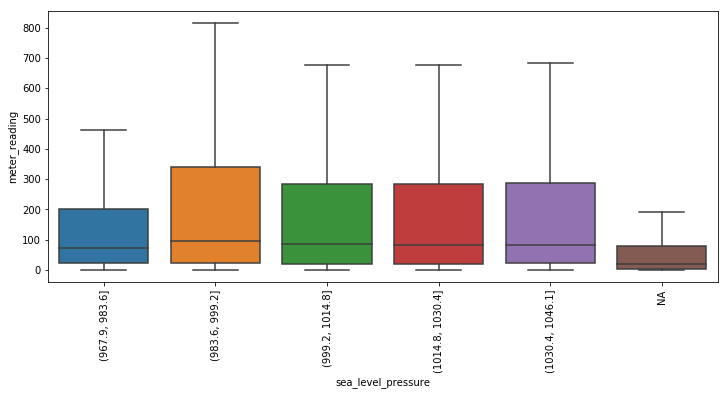

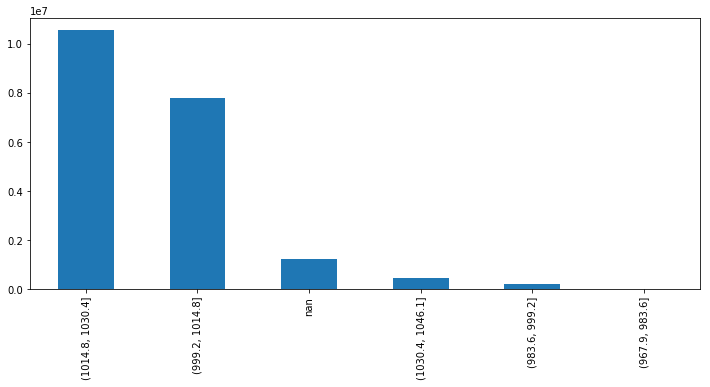

---------------------------------------------------------
---------------------------------------------------------
wind_direction
SAME FREQUENCY BINNING:


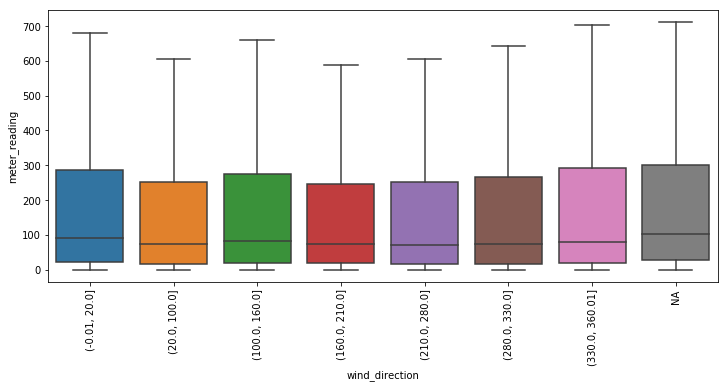

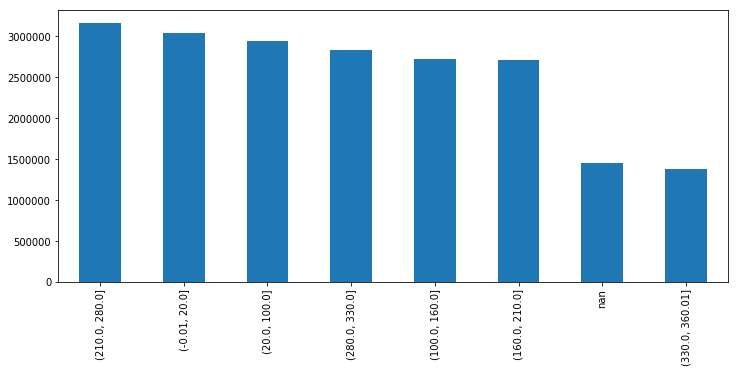

SAME DISTANCE BINNING:


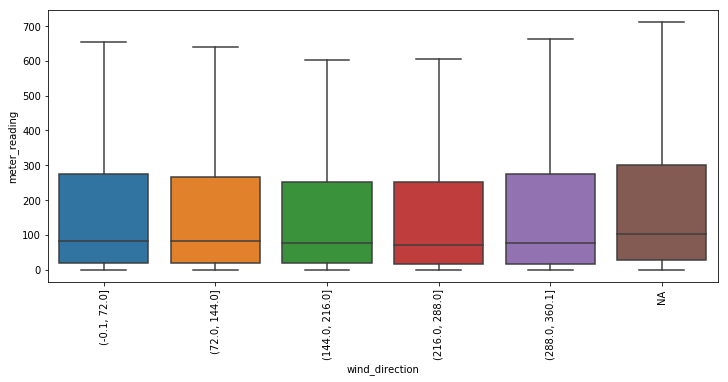

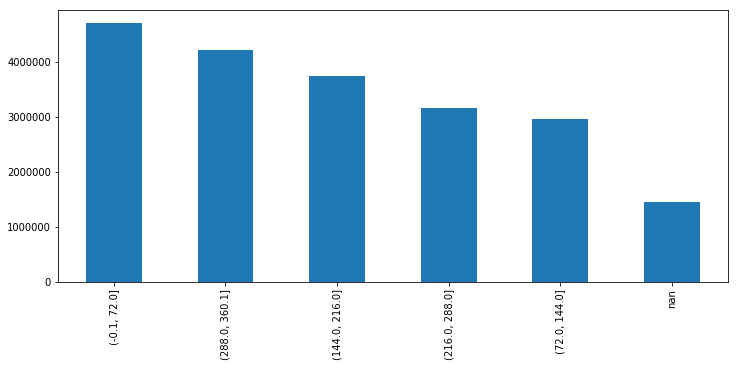

---------------------------------------------------------
---------------------------------------------------------
wind_speed
SAME FREQUENCY BINNING:


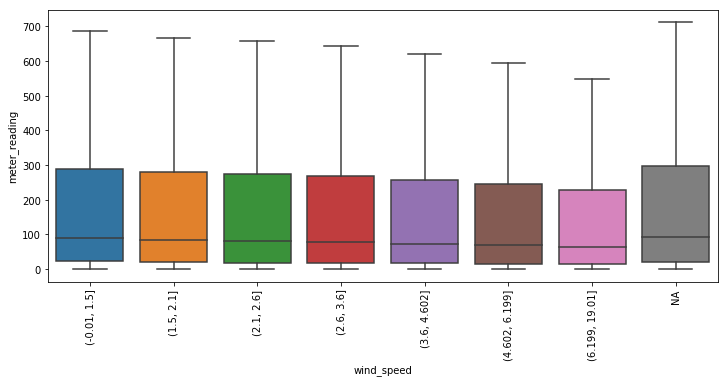

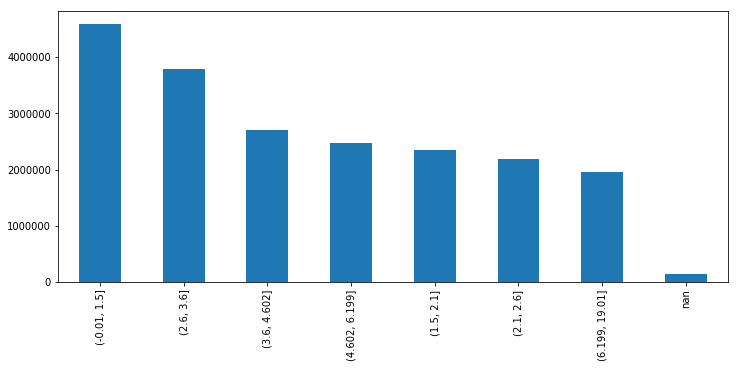

SAME DISTANCE BINNING:


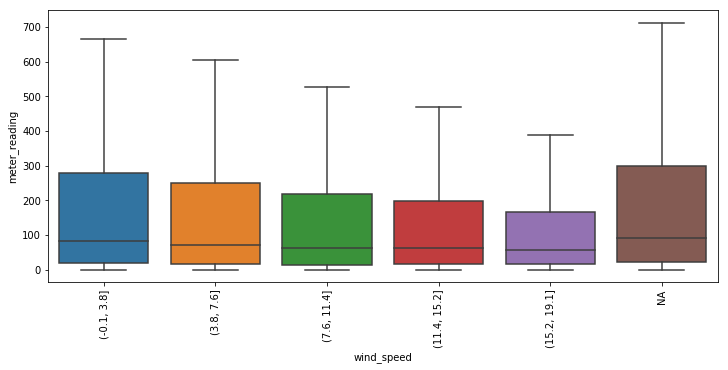

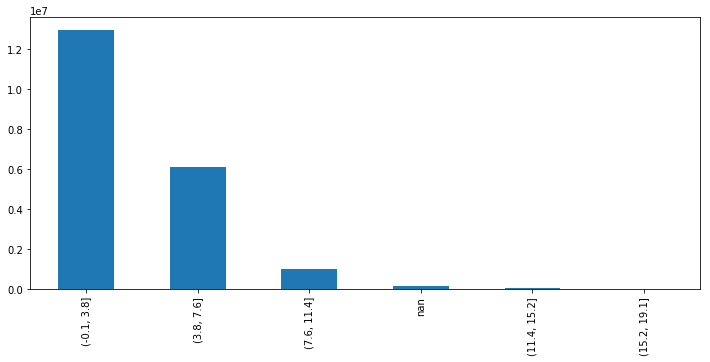

---------------------------------------------------------
---------------------------------------------------------
site_rownum
SAME FREQUENCY BINNING:


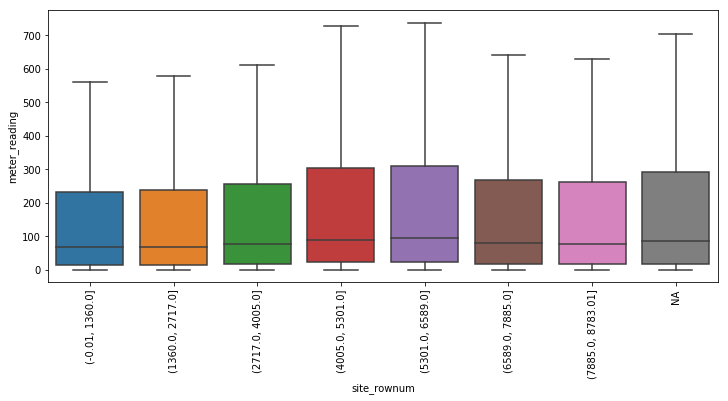

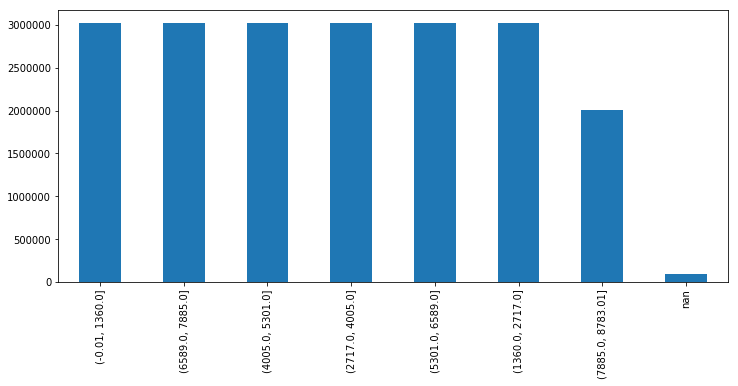

SAME DISTANCE BINNING:


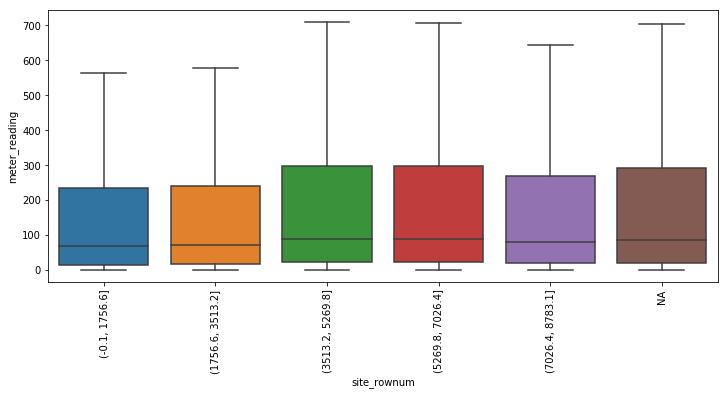

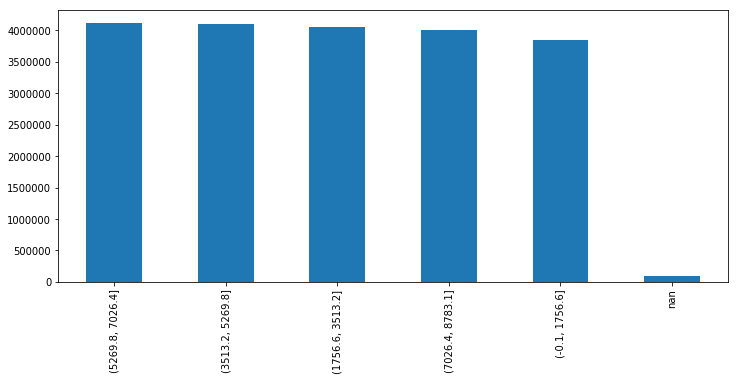

---------------------------------------------------------
---------------------------------------------------------
air_temperature_1
SAME FREQUENCY BINNING:


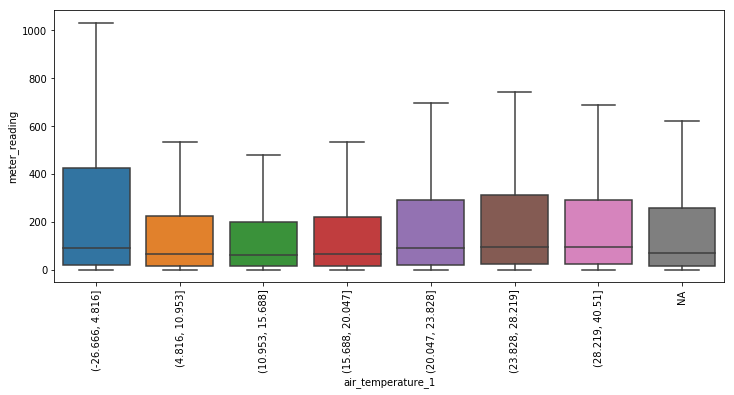

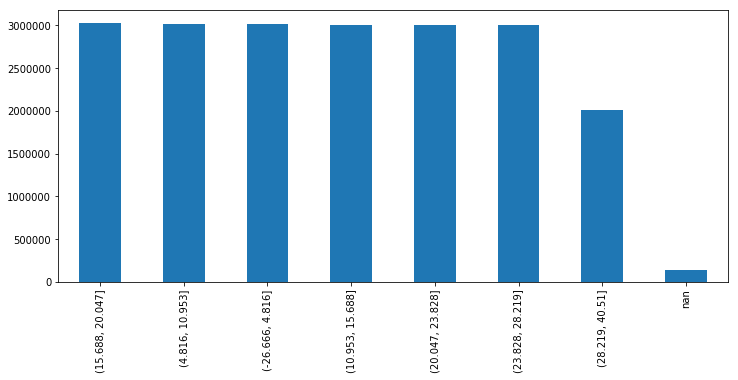

SAME DISTANCE BINNING:


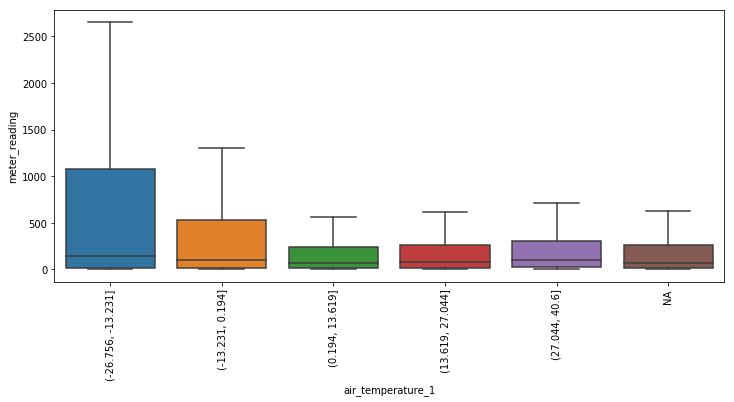

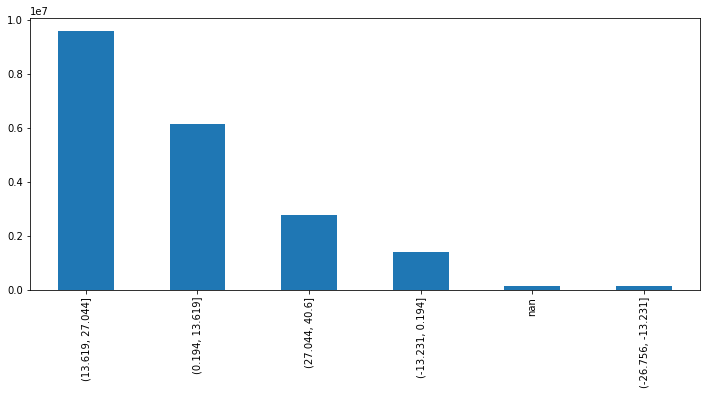

---------------------------------------------------------
---------------------------------------------------------
cloud_coverage_1
SAME FREQUENCY BINNING:


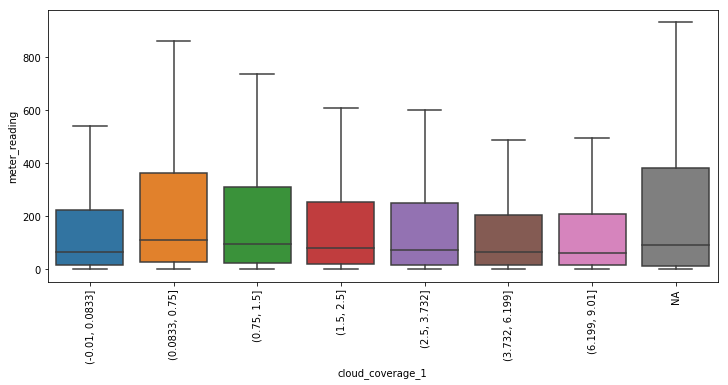

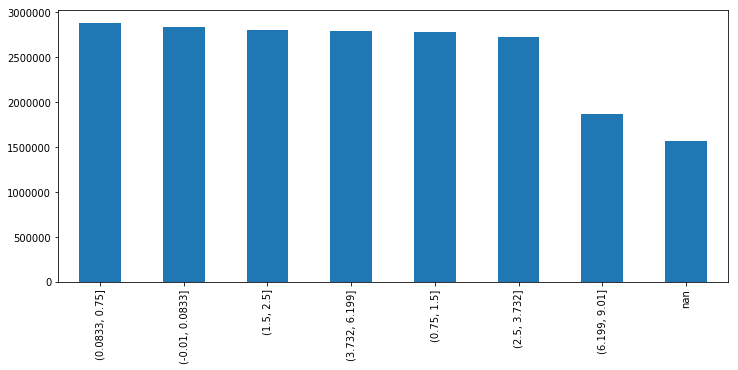

SAME DISTANCE BINNING:


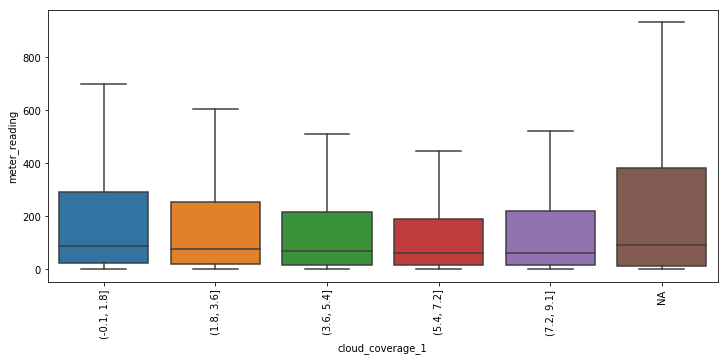

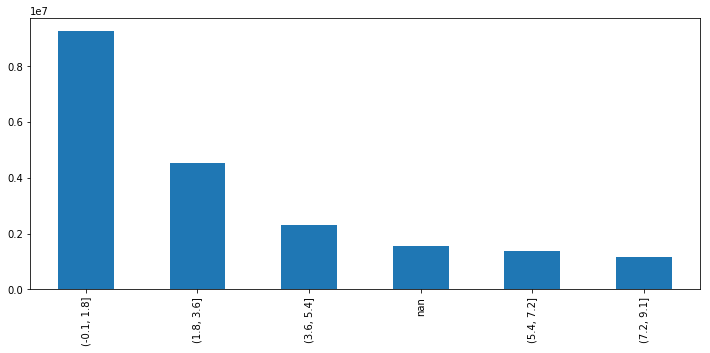

---------------------------------------------------------
---------------------------------------------------------
dew_temperature_1
SAME FREQUENCY BINNING:


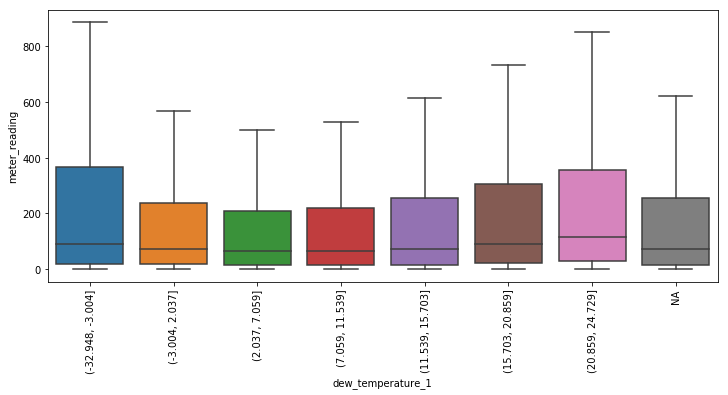

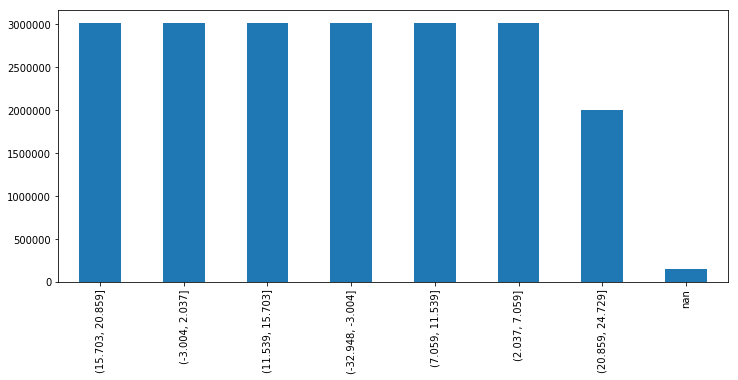

SAME DISTANCE BINNING:


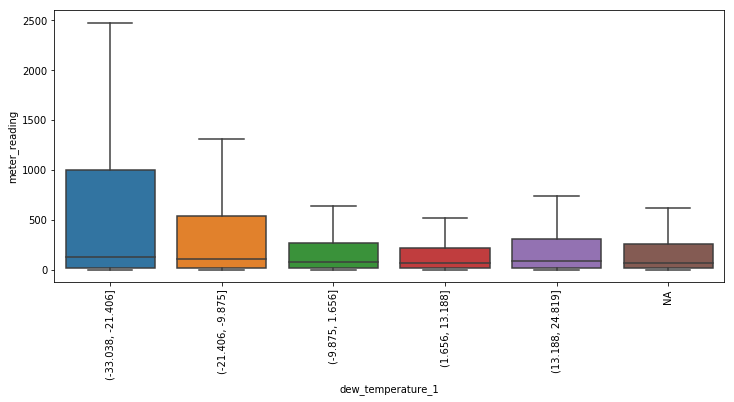

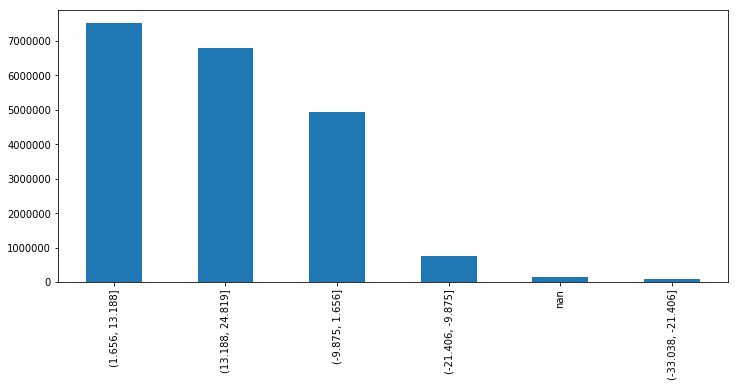

---------------------------------------------------------
---------------------------------------------------------
precip_depth_1_hr_1
SAME FREQUENCY BINNING:


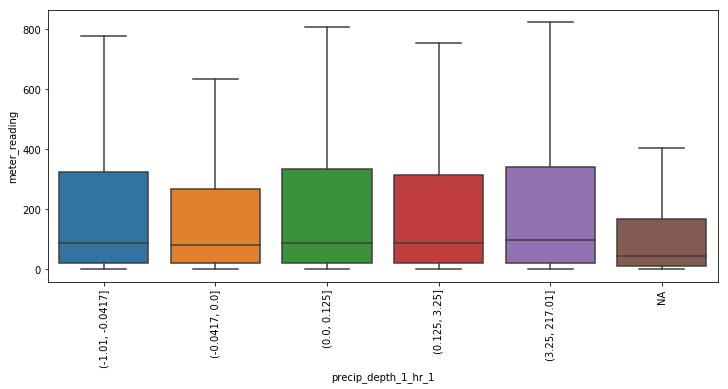

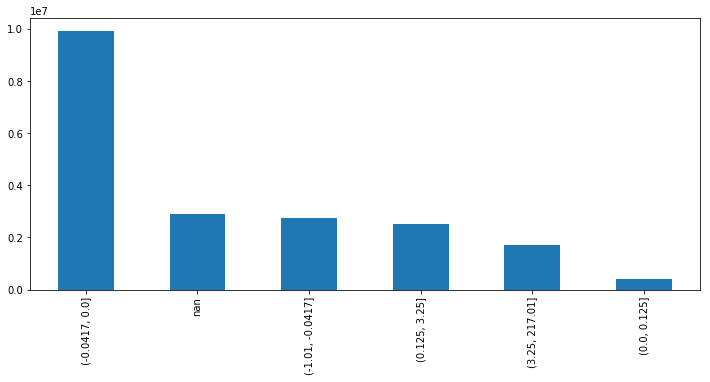

SAME DISTANCE BINNING:


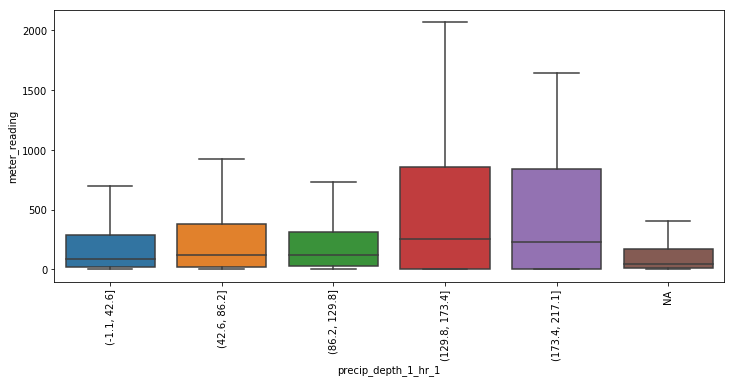

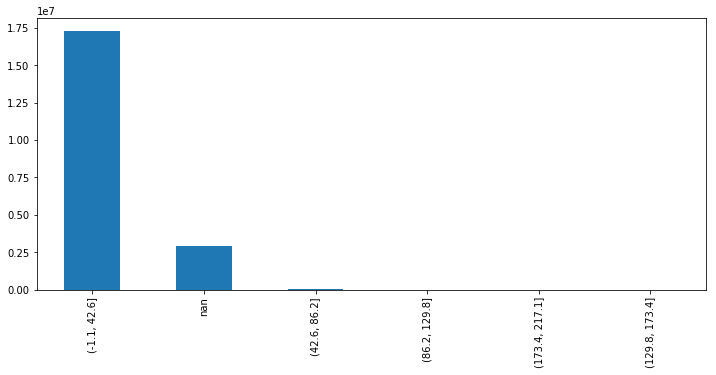

---------------------------------------------------------
---------------------------------------------------------
wind_speed_1
SAME FREQUENCY BINNING:


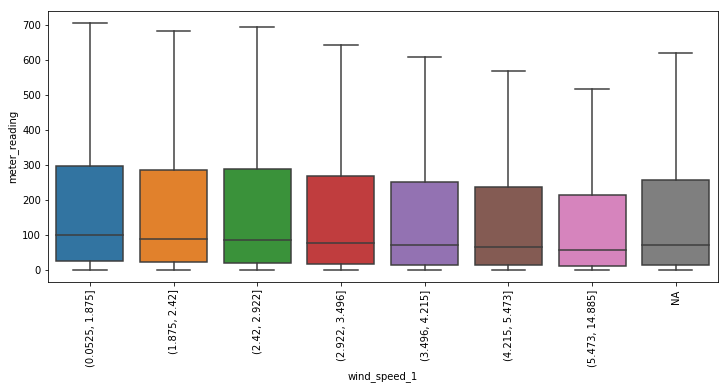

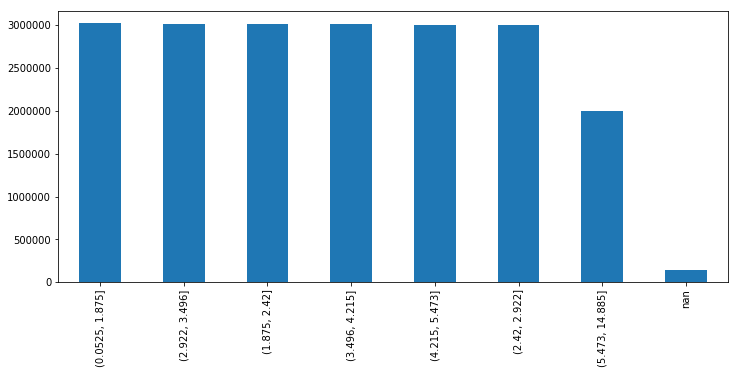

SAME DISTANCE BINNING:


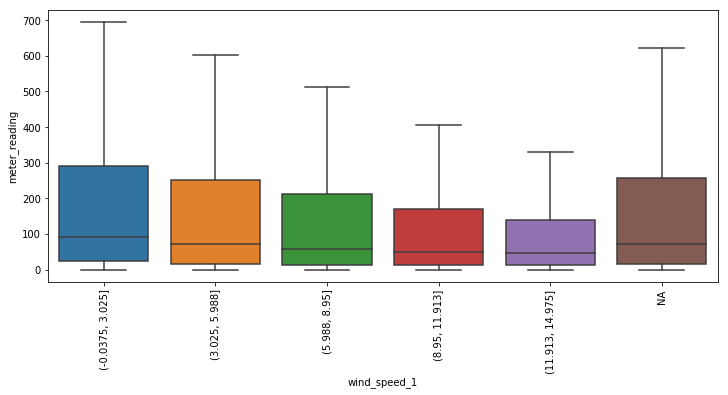

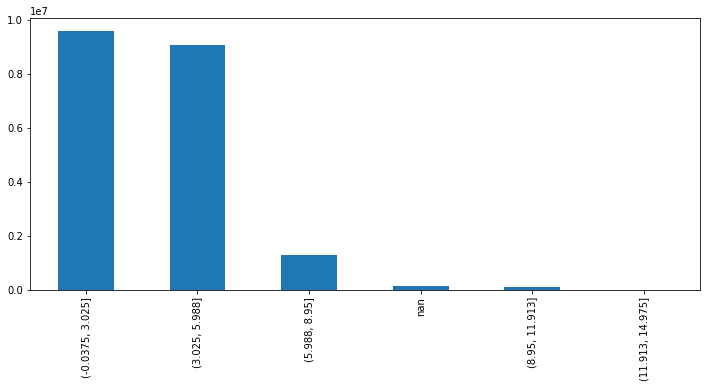

---------------------------------------------------------
---------------------------------------------------------
air_temperature_3
SAME FREQUENCY BINNING:


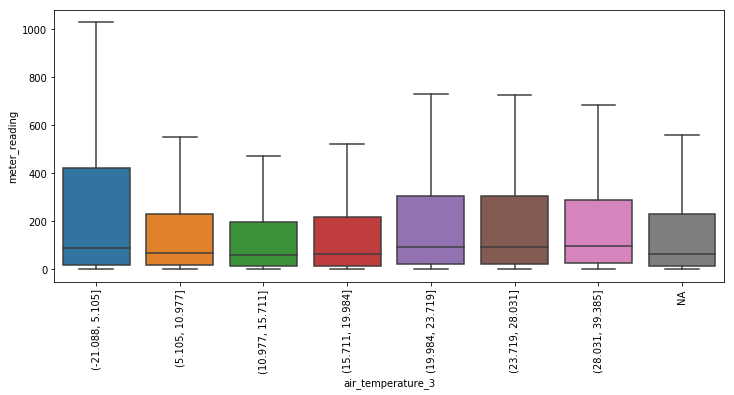

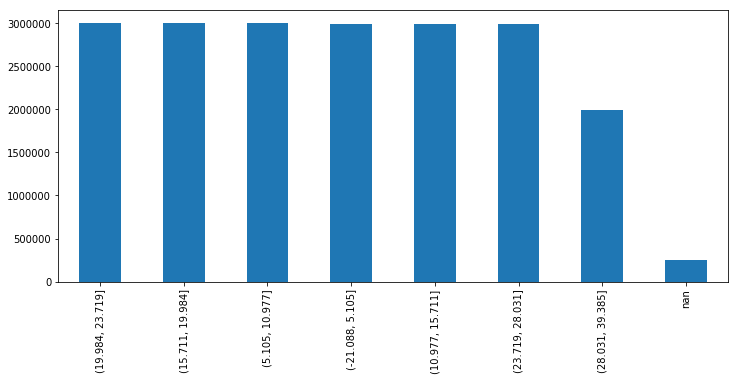

SAME DISTANCE BINNING:


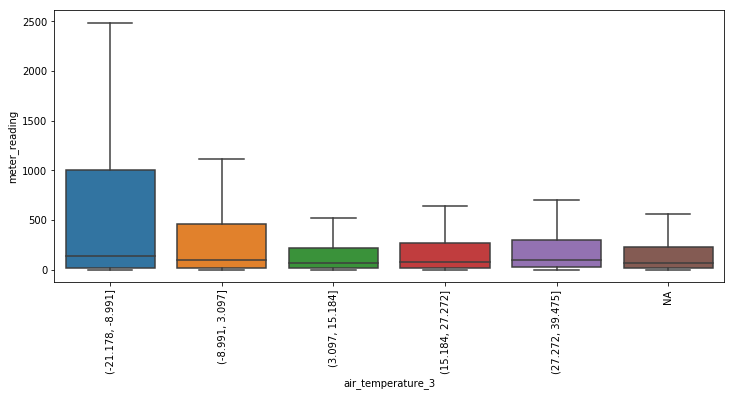

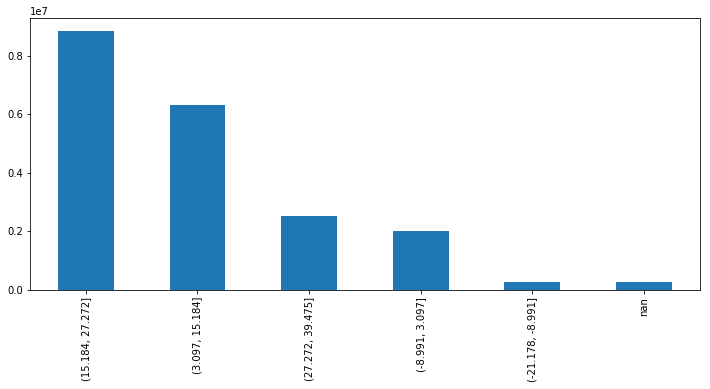

---------------------------------------------------------
---------------------------------------------------------
cloud_coverage_3
SAME FREQUENCY BINNING:


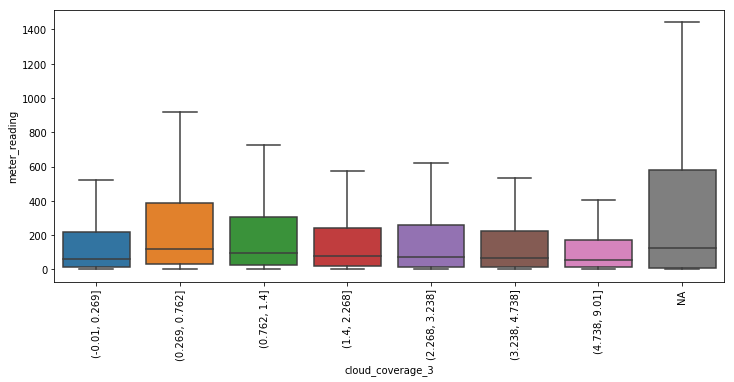

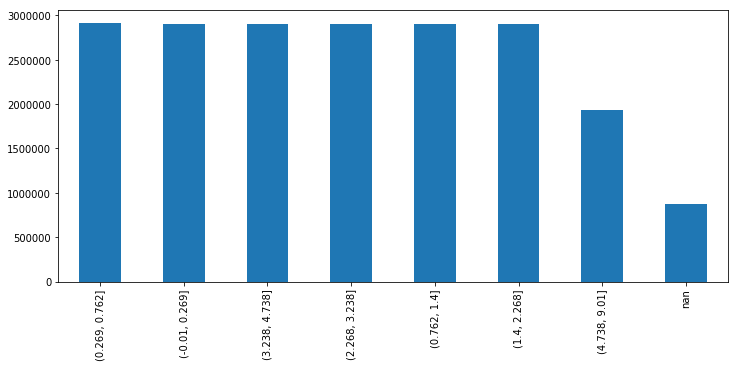

SAME DISTANCE BINNING:


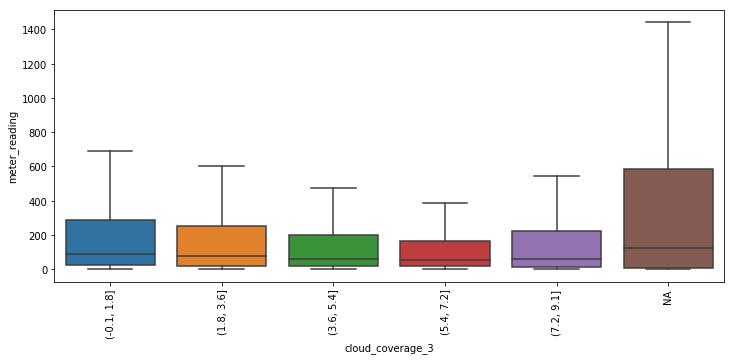

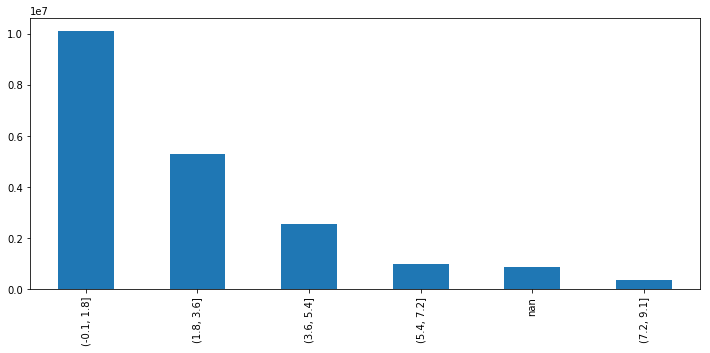

---------------------------------------------------------
---------------------------------------------------------
dew_temperature_3
SAME FREQUENCY BINNING:


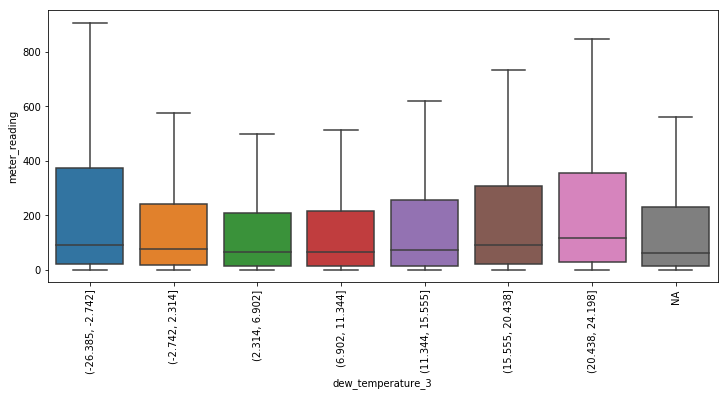

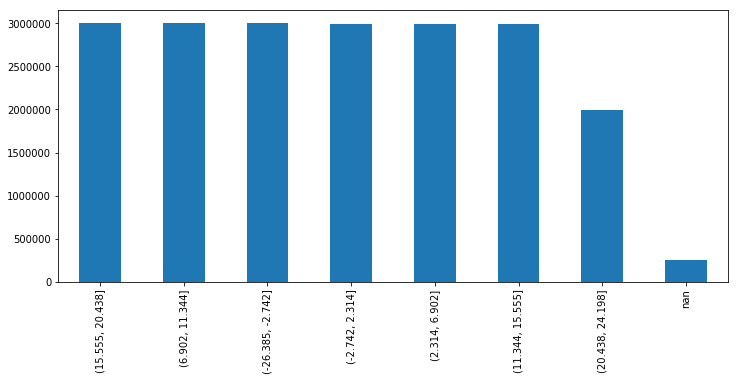

SAME DISTANCE BINNING:


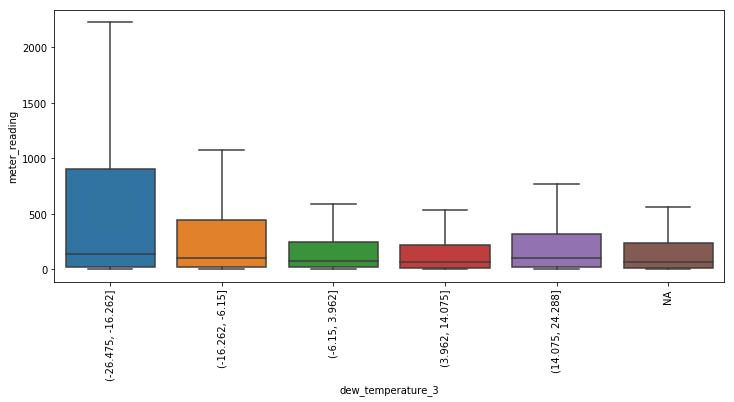

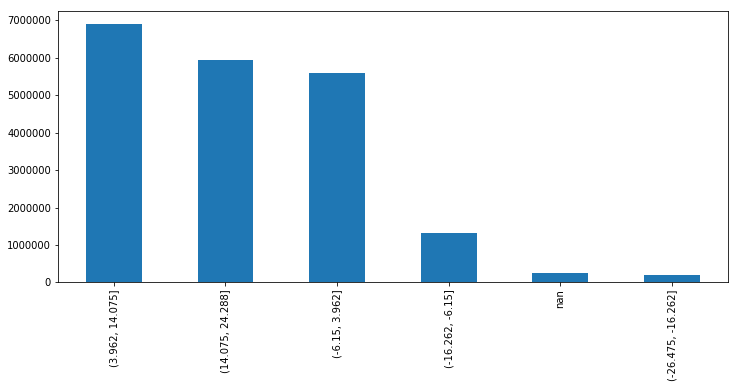

---------------------------------------------------------
---------------------------------------------------------
precip_depth_1_hr_3
SAME FREQUENCY BINNING:


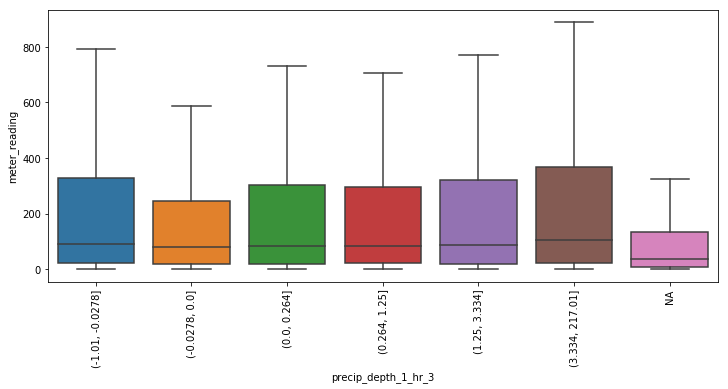

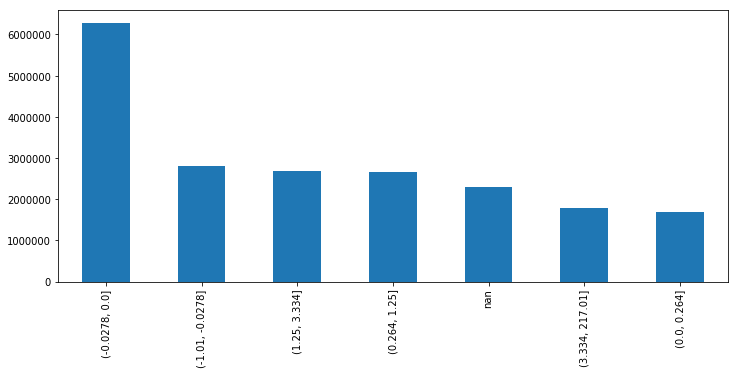

SAME DISTANCE BINNING:


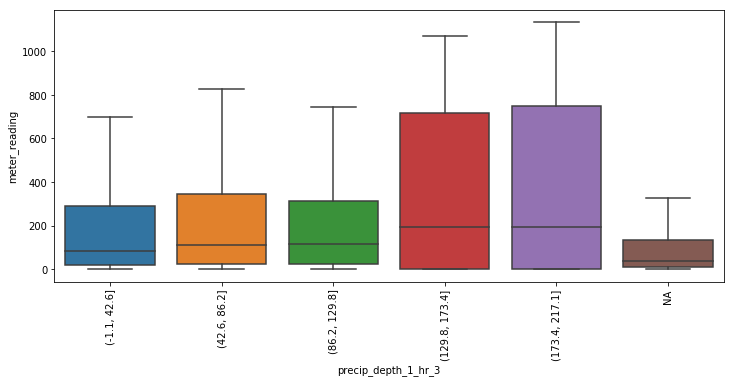

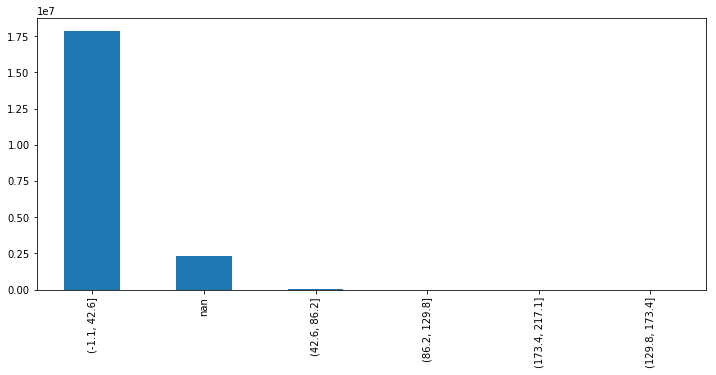

---------------------------------------------------------
---------------------------------------------------------
wind_speed_3
SAME FREQUENCY BINNING:


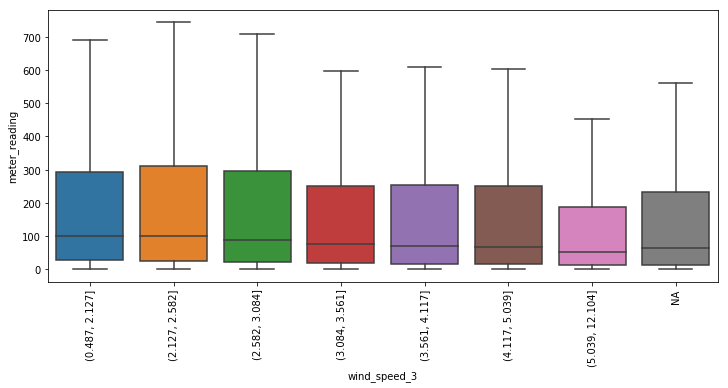

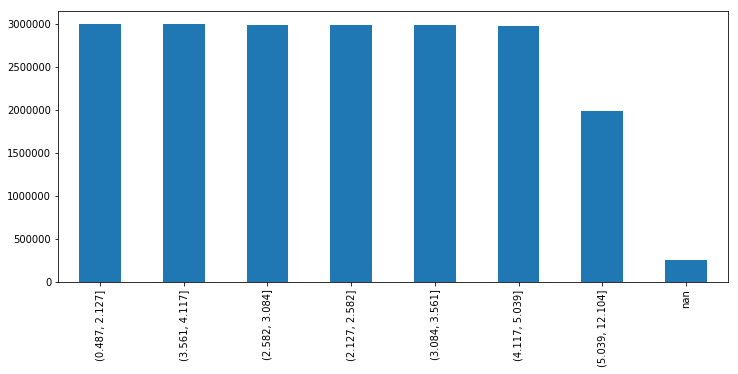

SAME DISTANCE BINNING:


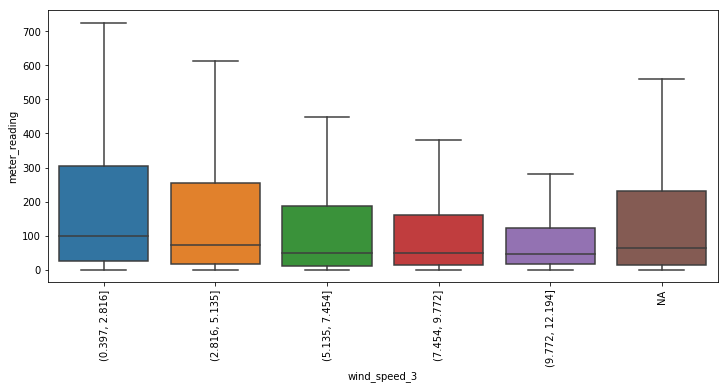

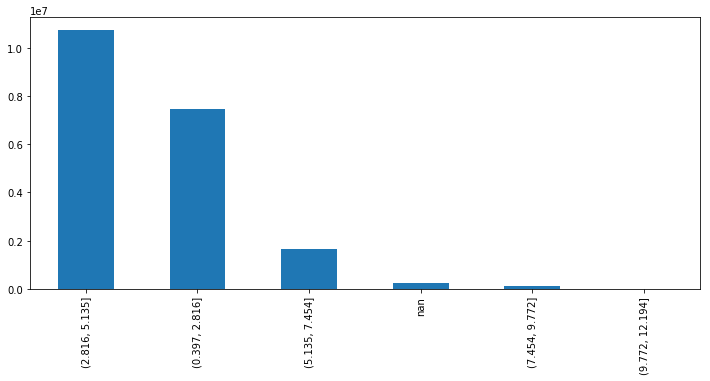

---------------------------------------------------------
---------------------------------------------------------
air_temperature_7
SAME FREQUENCY BINNING:


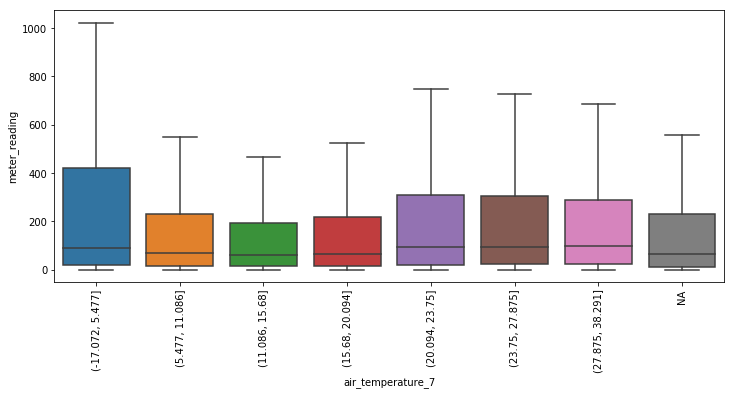

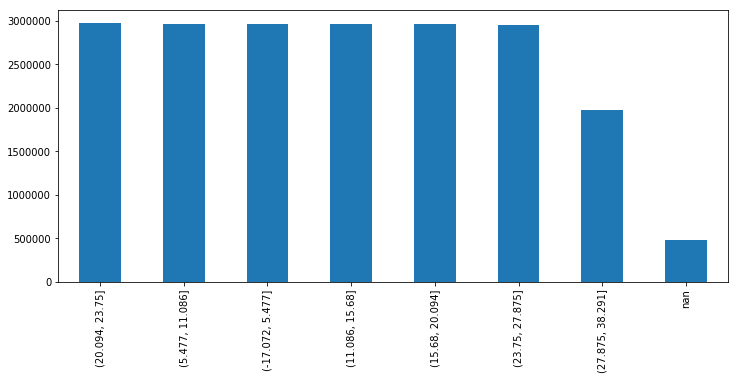

SAME DISTANCE BINNING:


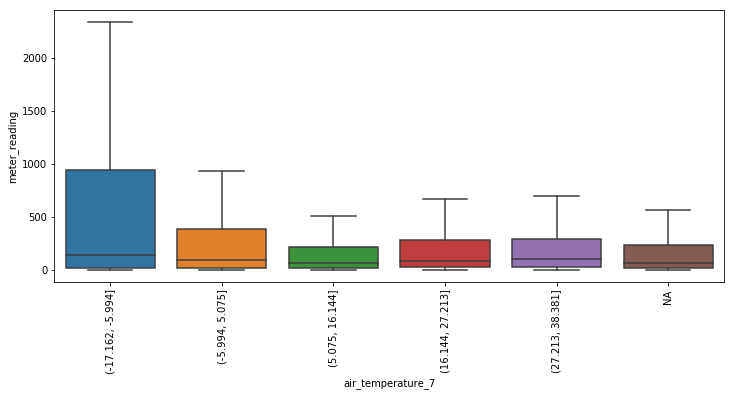

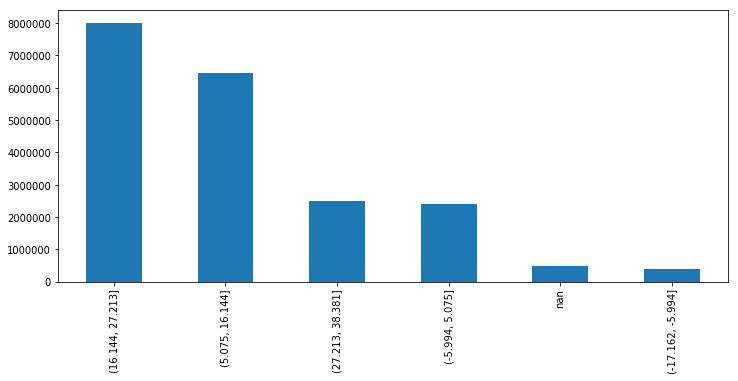

---------------------------------------------------------
---------------------------------------------------------
cloud_coverage_7
SAME FREQUENCY BINNING:


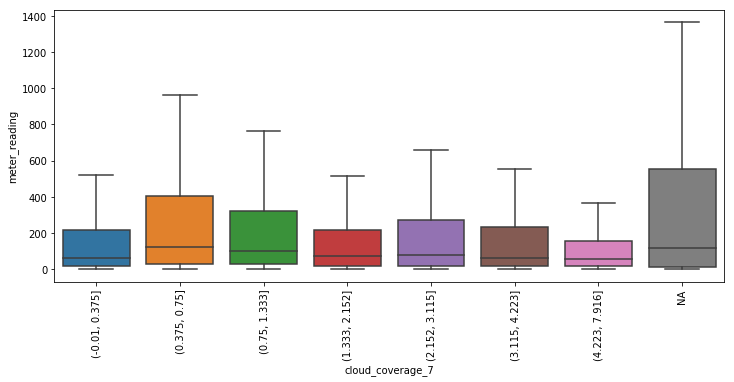

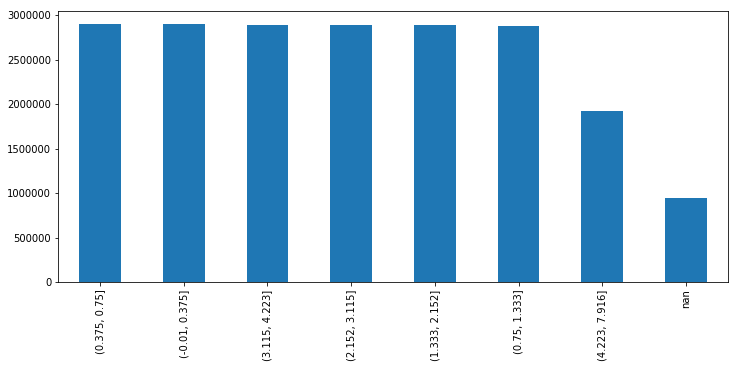

SAME DISTANCE BINNING:


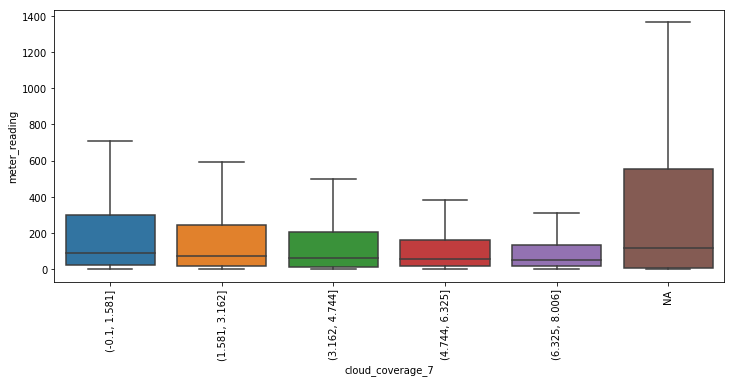

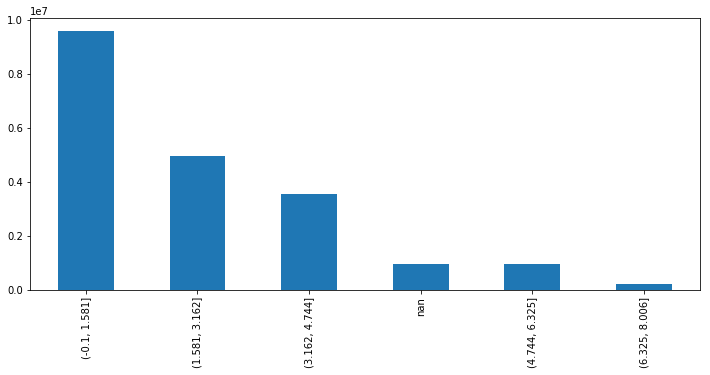

---------------------------------------------------------
---------------------------------------------------------
dew_temperature_7
SAME FREQUENCY BINNING:


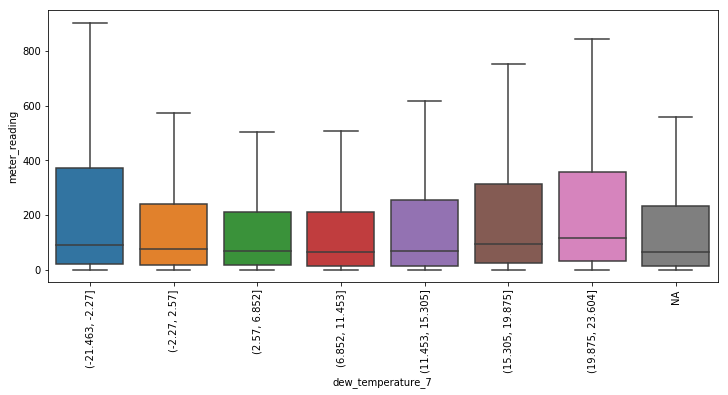

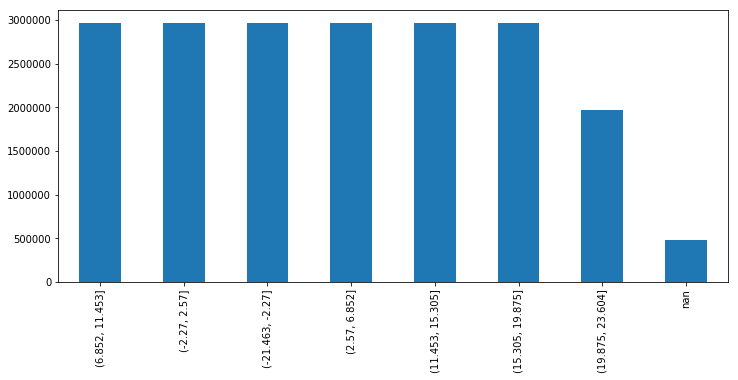

SAME DISTANCE BINNING:


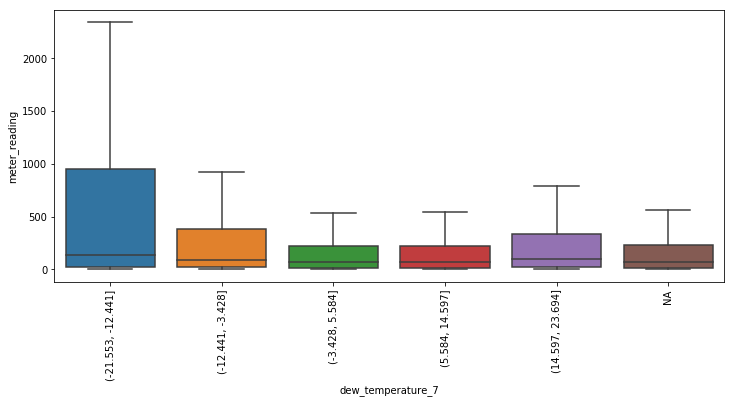

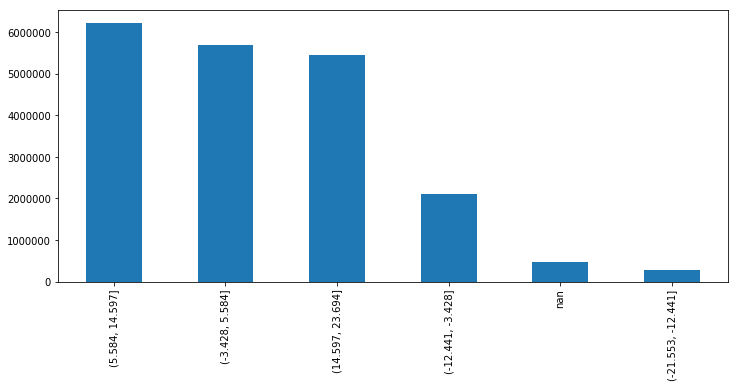

---------------------------------------------------------
---------------------------------------------------------
precip_depth_1_hr_7
SAME FREQUENCY BINNING:


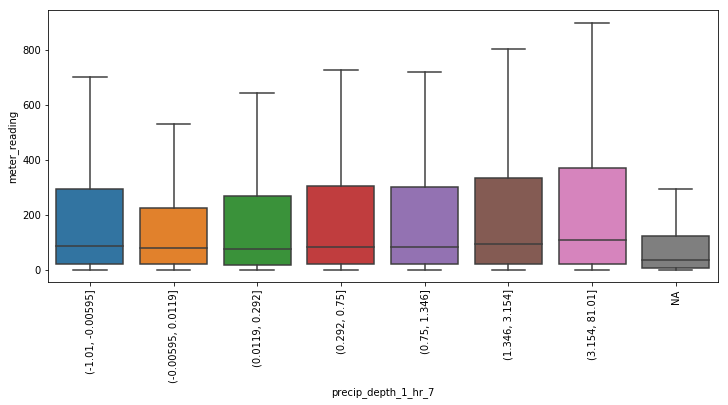

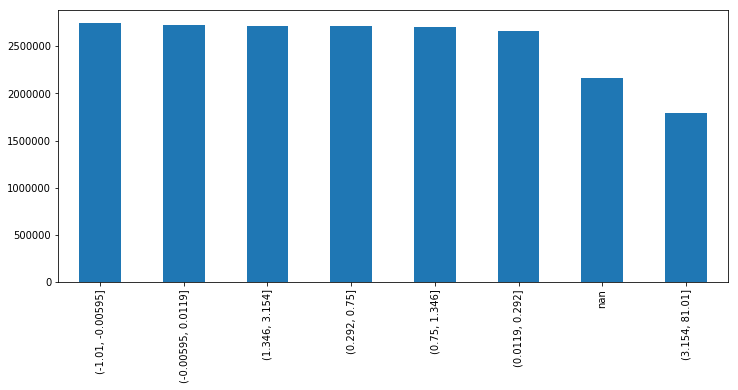

SAME DISTANCE BINNING:


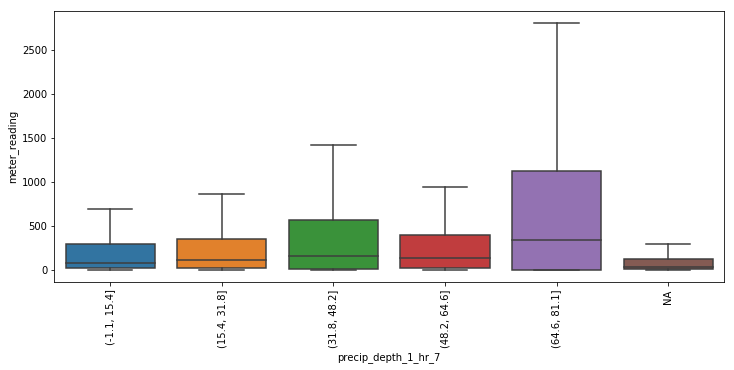

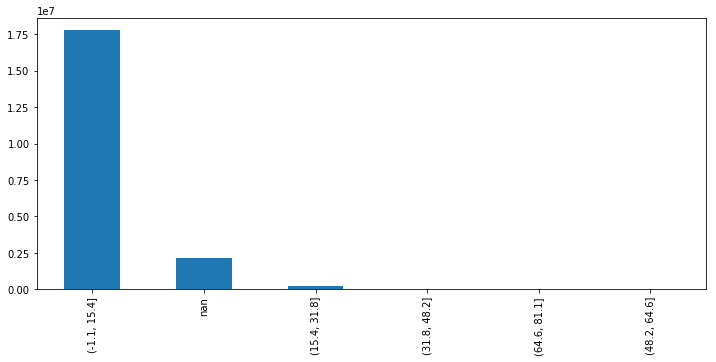

---------------------------------------------------------
---------------------------------------------------------
wind_speed_7
SAME FREQUENCY BINNING:


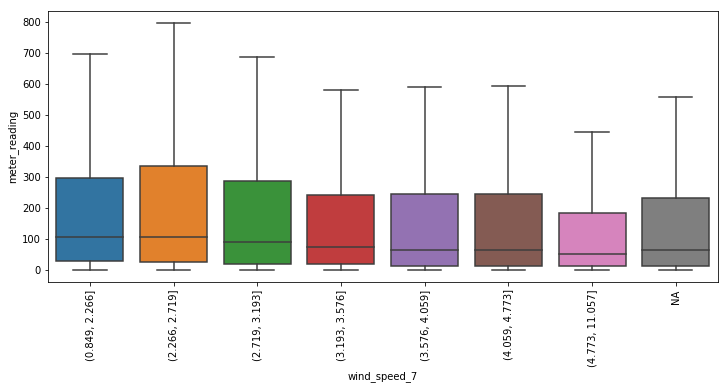

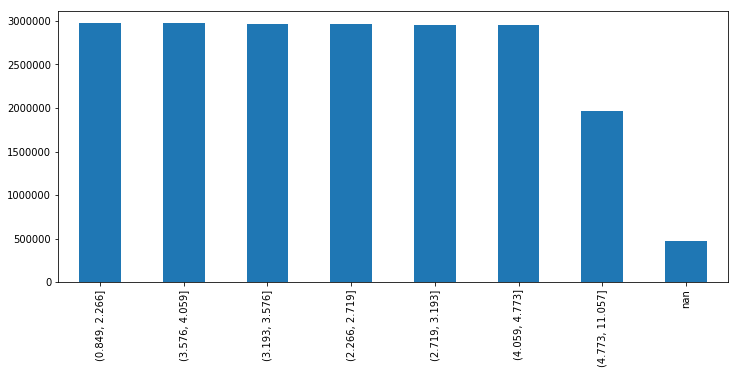

SAME DISTANCE BINNING:


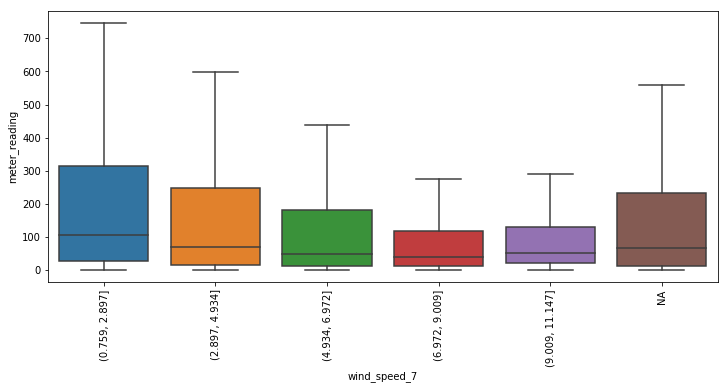

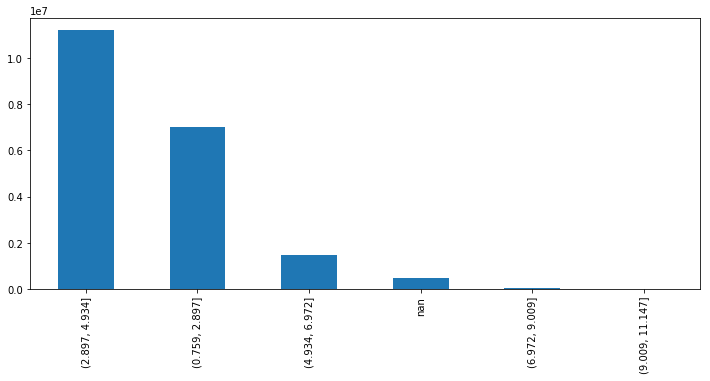

---------------------------------------------------------
---------------------------------------------------------
air_temperature_14
SAME FREQUENCY BINNING:


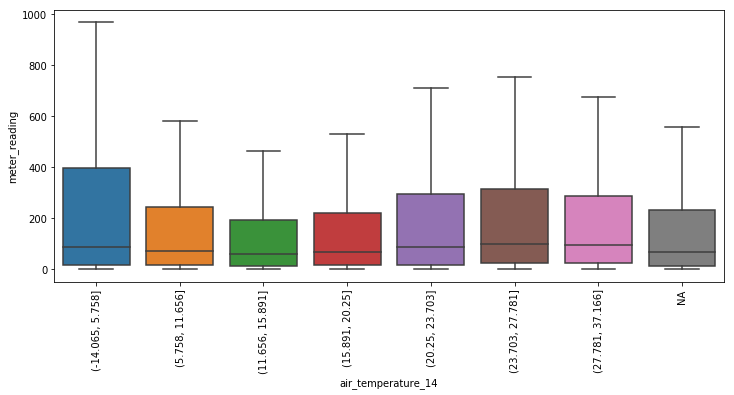

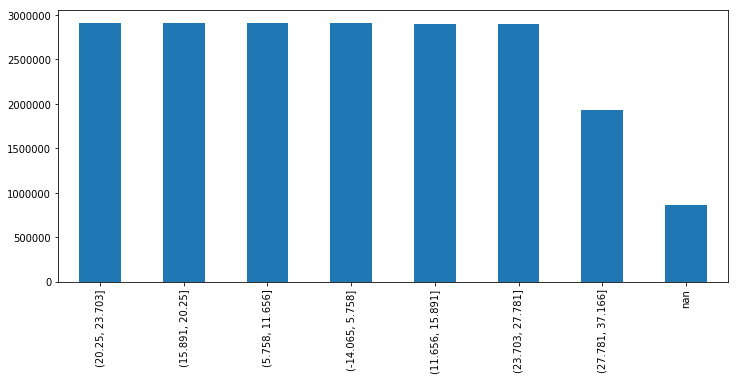

SAME DISTANCE BINNING:


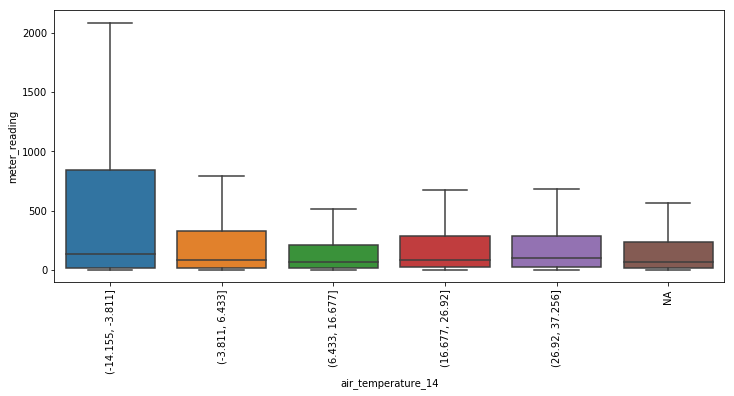

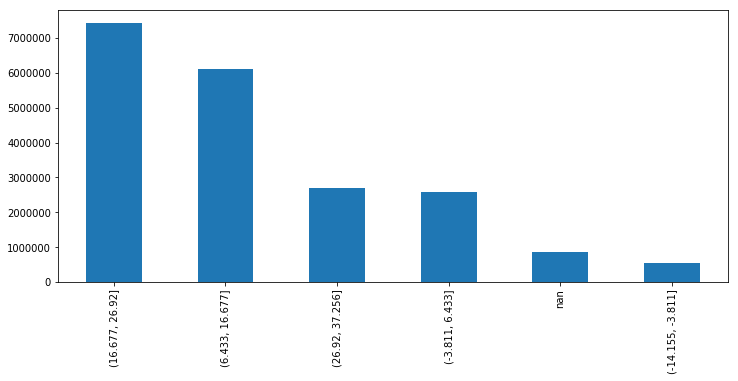

---------------------------------------------------------
---------------------------------------------------------
cloud_coverage_14
SAME FREQUENCY BINNING:


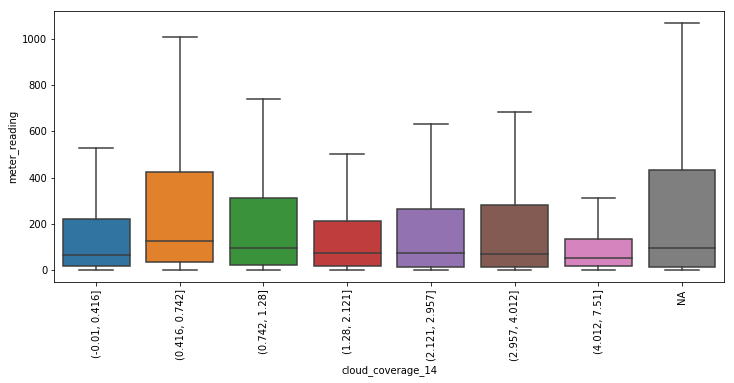

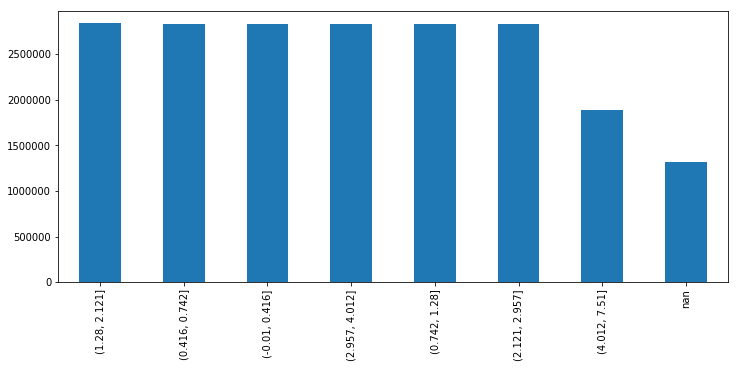

SAME DISTANCE BINNING:


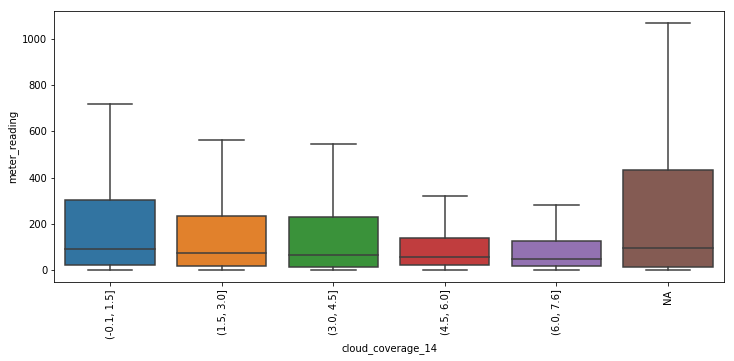

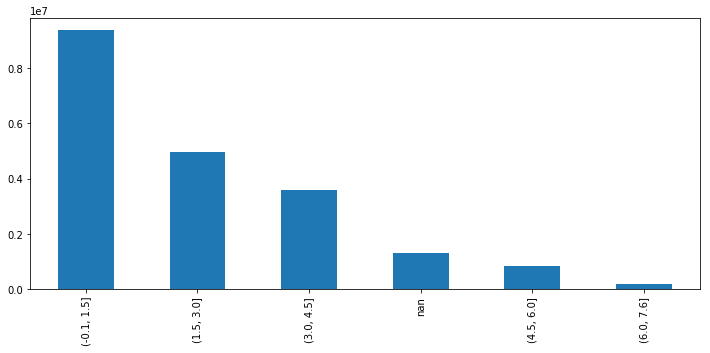

---------------------------------------------------------
---------------------------------------------------------
dew_temperature_14
SAME FREQUENCY BINNING:


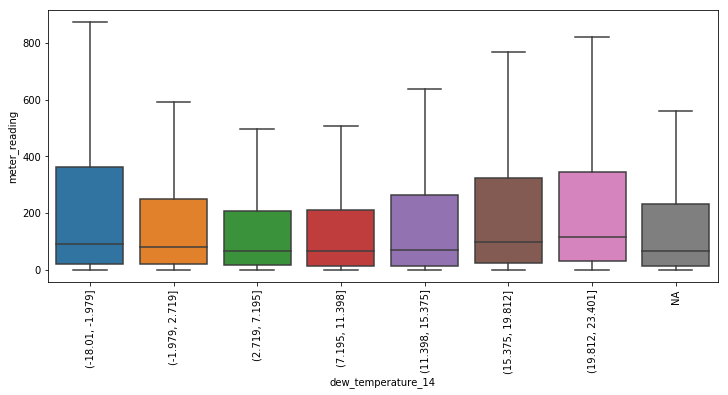

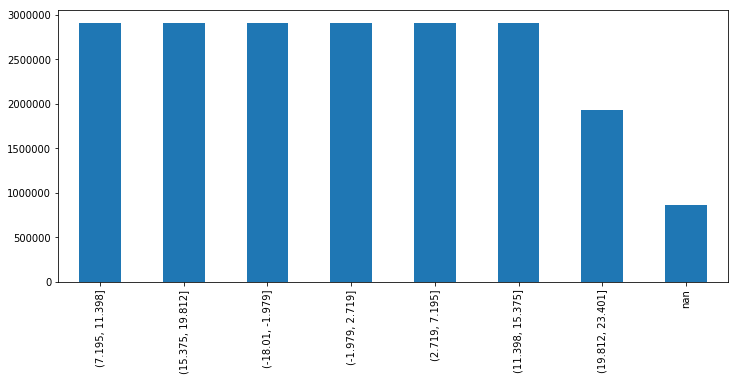

SAME DISTANCE BINNING:


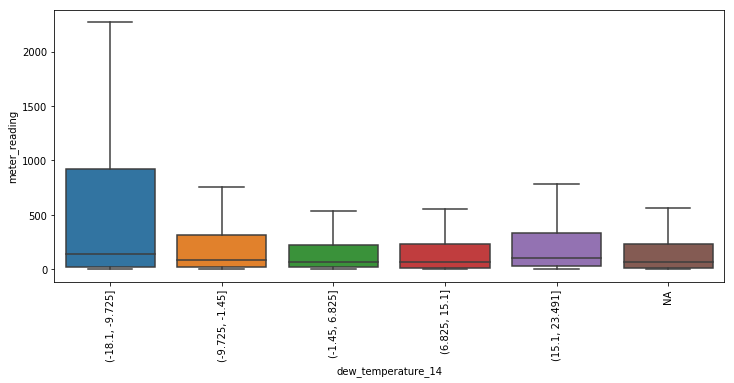

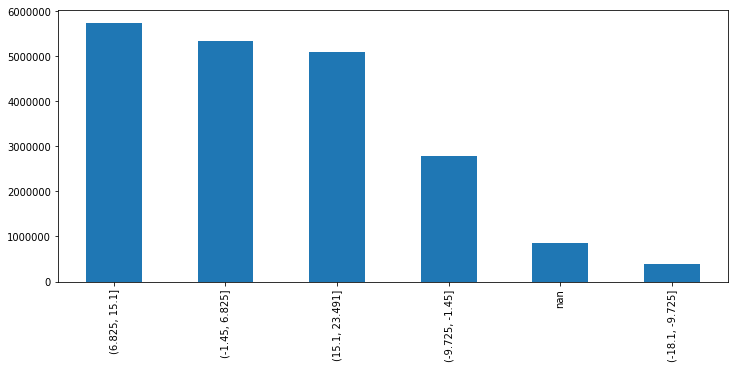

---------------------------------------------------------
---------------------------------------------------------
precip_depth_1_hr_14
SAME FREQUENCY BINNING:


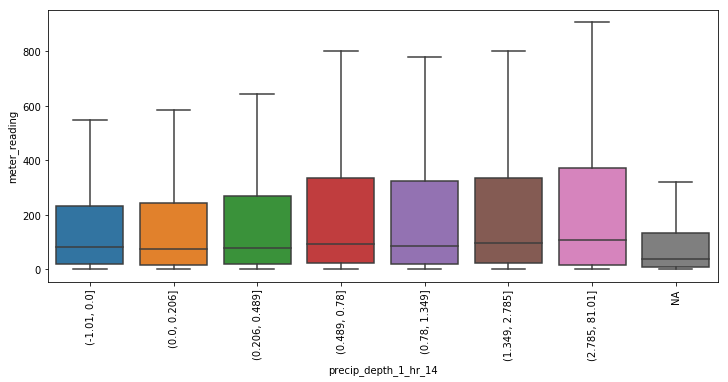

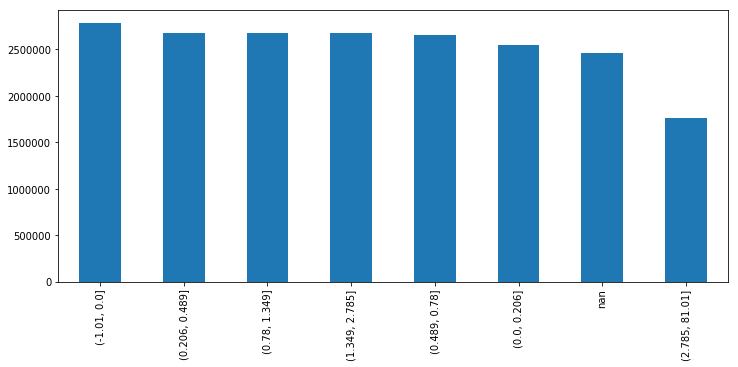

SAME DISTANCE BINNING:


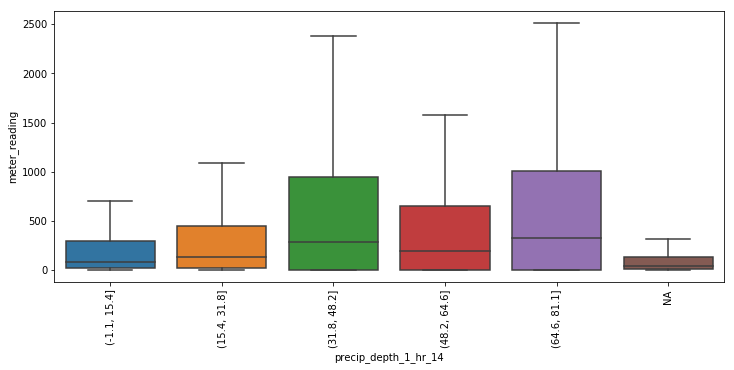

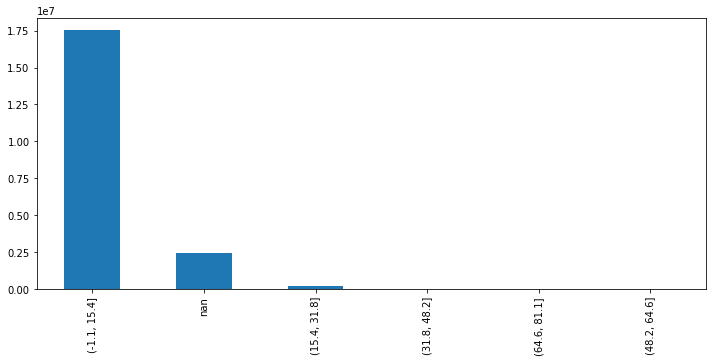

---------------------------------------------------------
---------------------------------------------------------
wind_speed_14
SAME FREQUENCY BINNING:


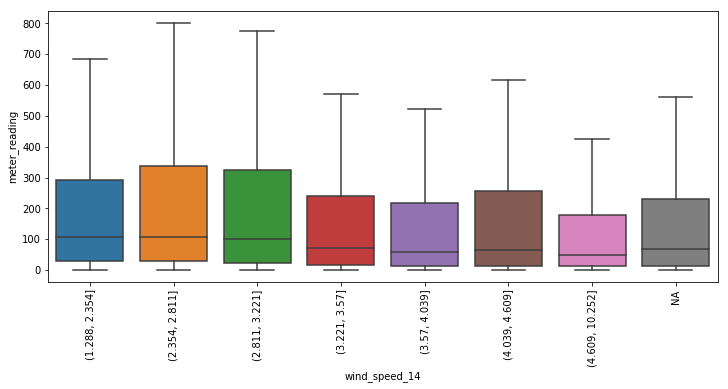

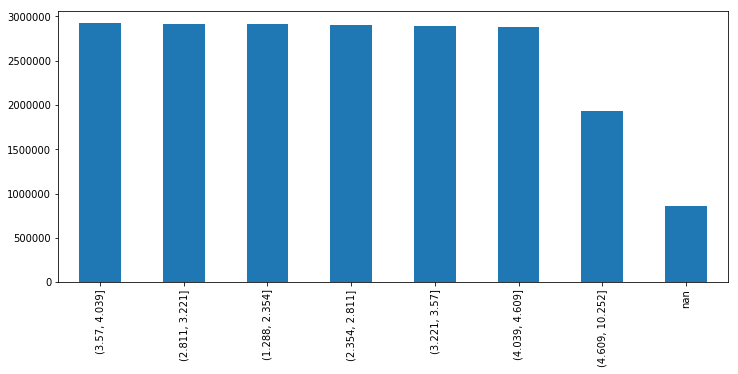

SAME DISTANCE BINNING:


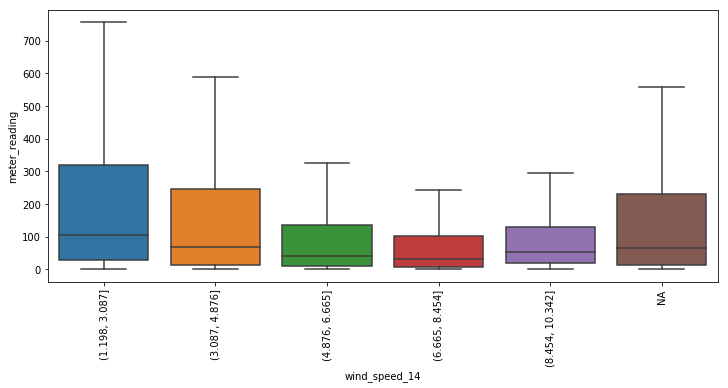

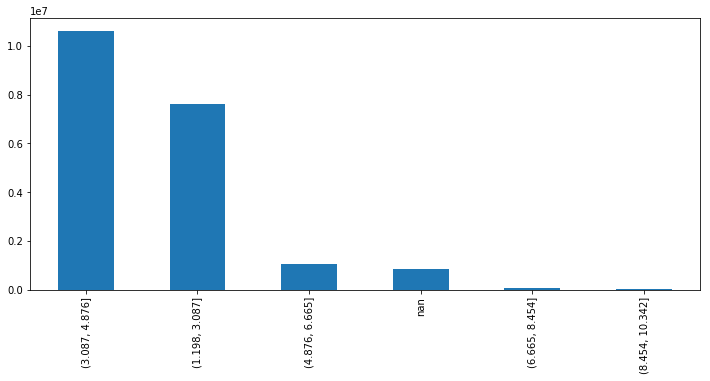

---------------------------------------------------------
---------------------------------------------------------
air_temperature_21
SAME FREQUENCY BINNING:


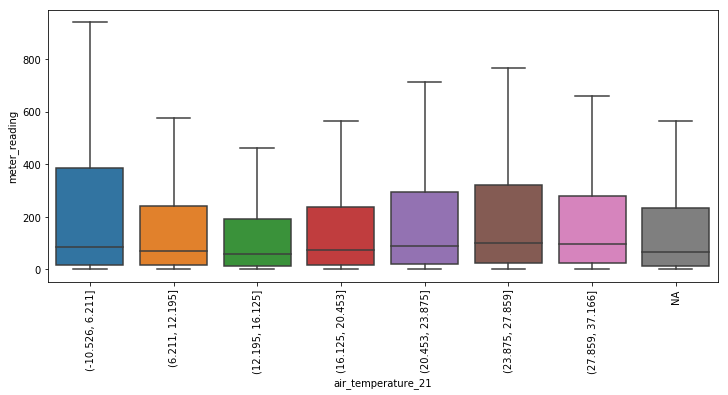

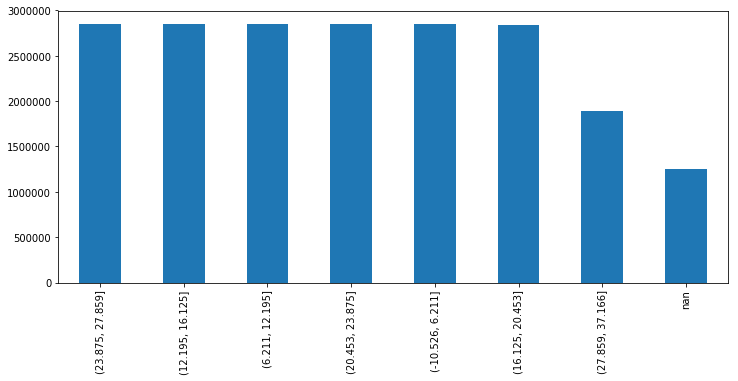

SAME DISTANCE BINNING:


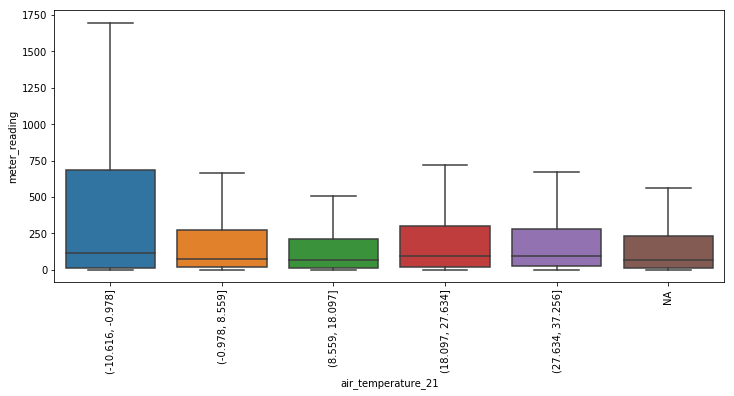

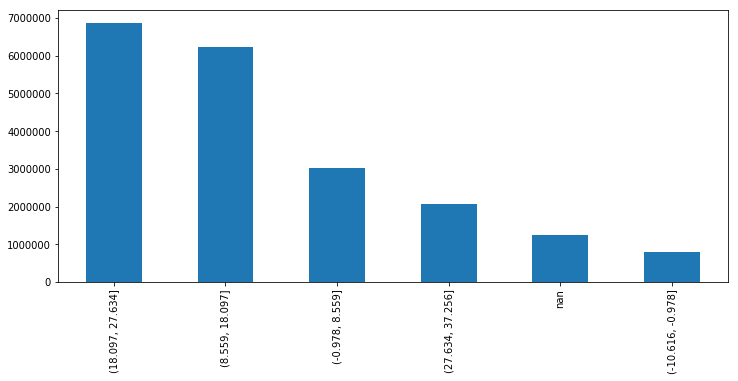

---------------------------------------------------------
---------------------------------------------------------
cloud_coverage_21
SAME FREQUENCY BINNING:


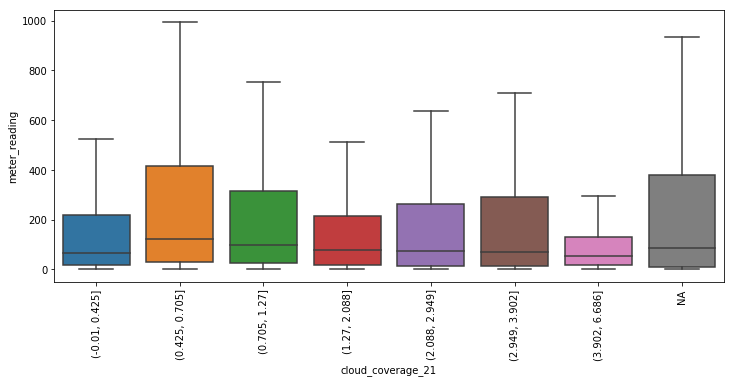

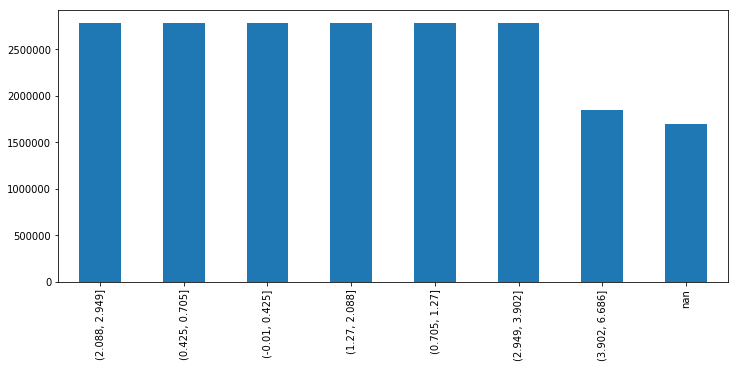

SAME DISTANCE BINNING:


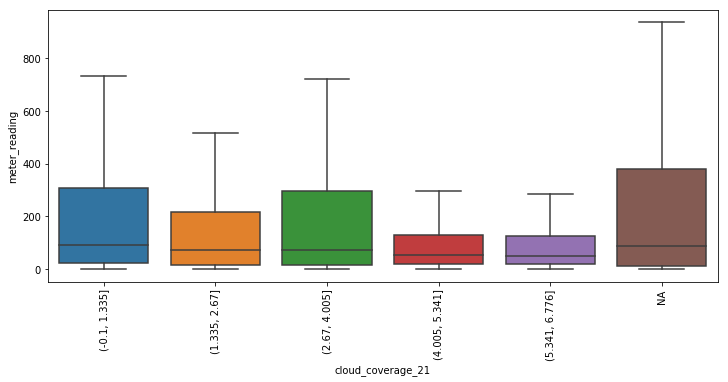

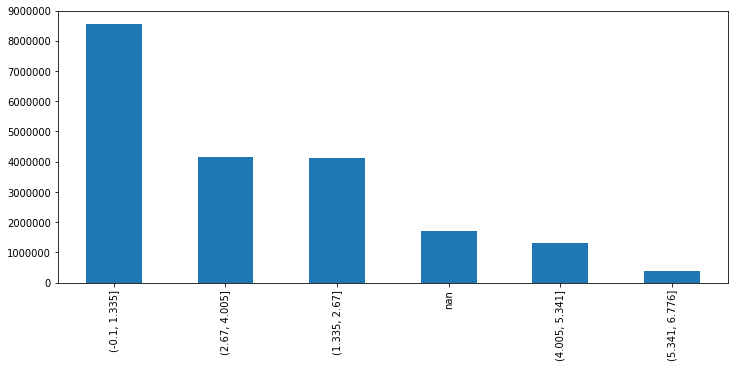

---------------------------------------------------------
---------------------------------------------------------
dew_temperature_21
SAME FREQUENCY BINNING:


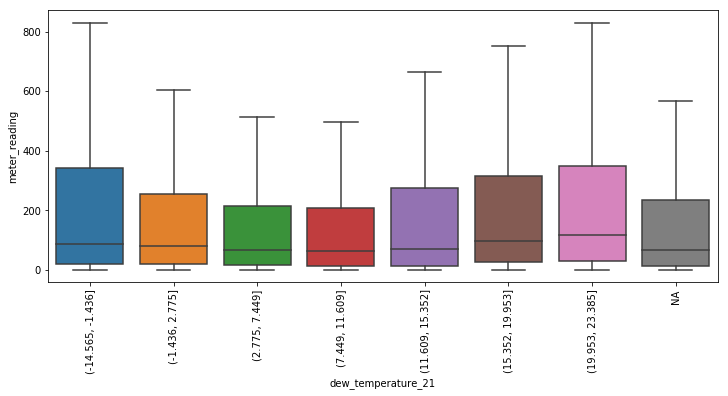

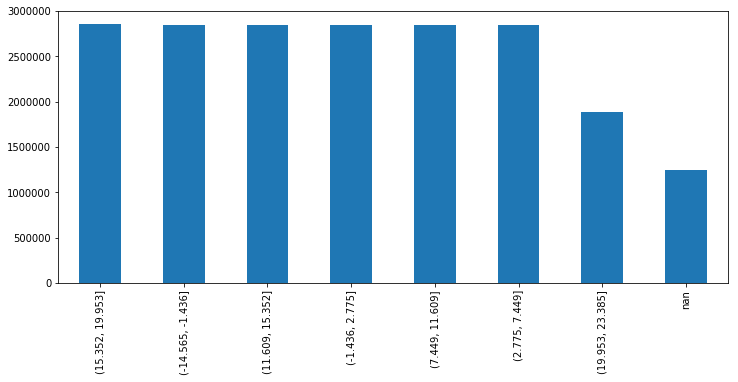

SAME DISTANCE BINNING:


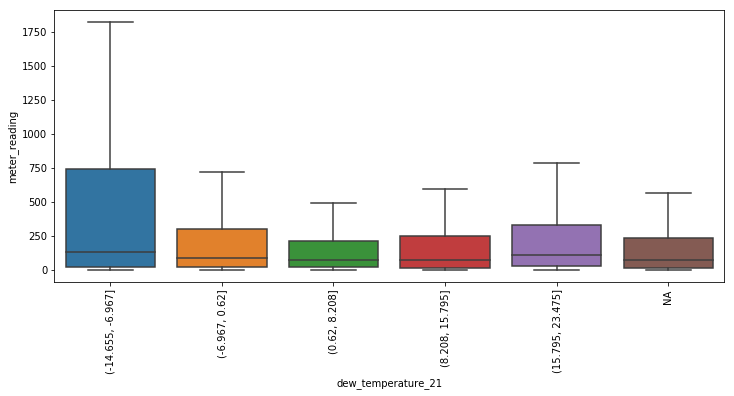

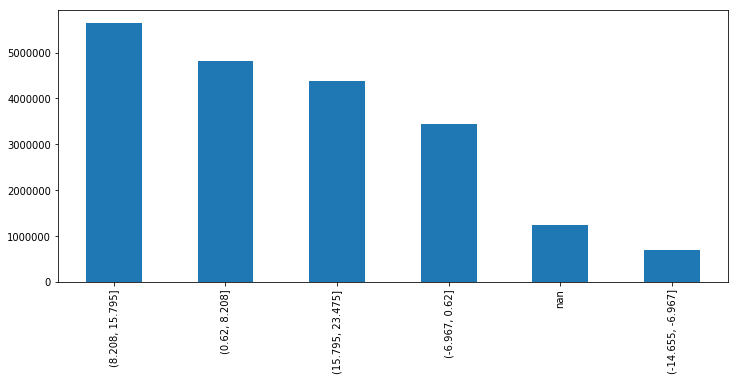

---------------------------------------------------------
---------------------------------------------------------
precip_depth_1_hr_21
SAME FREQUENCY BINNING:


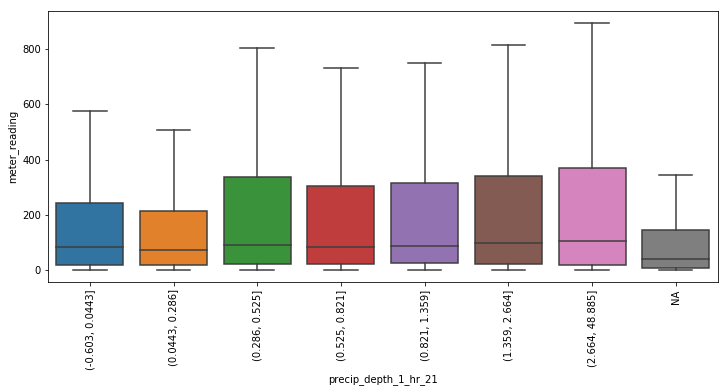

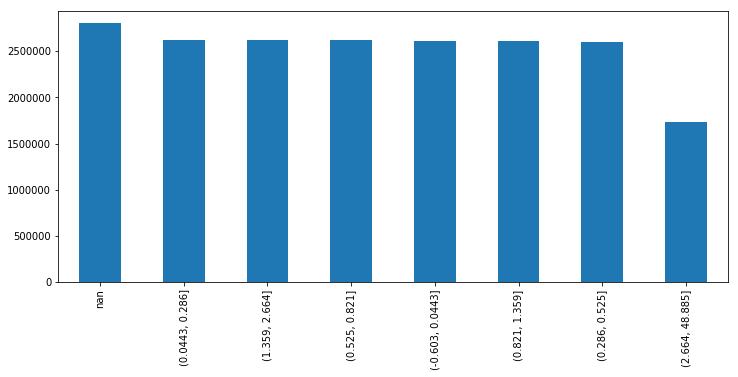

SAME DISTANCE BINNING:


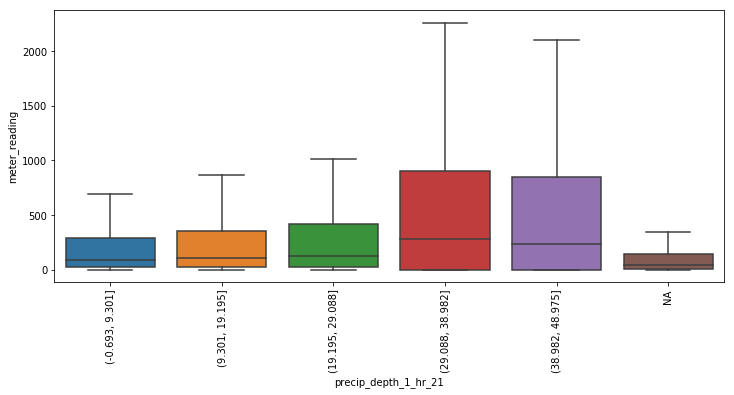

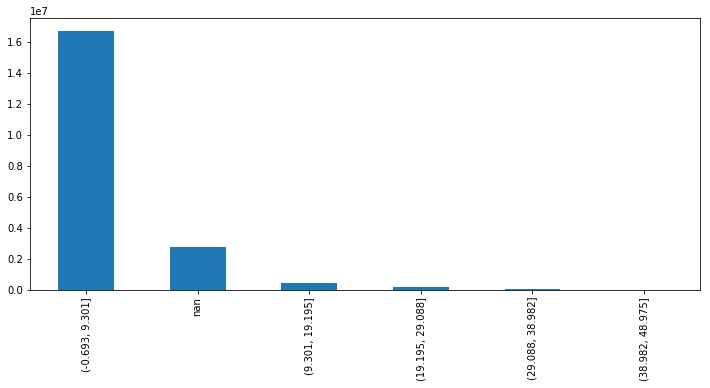

---------------------------------------------------------
---------------------------------------------------------
wind_speed_21
SAME FREQUENCY BINNING:


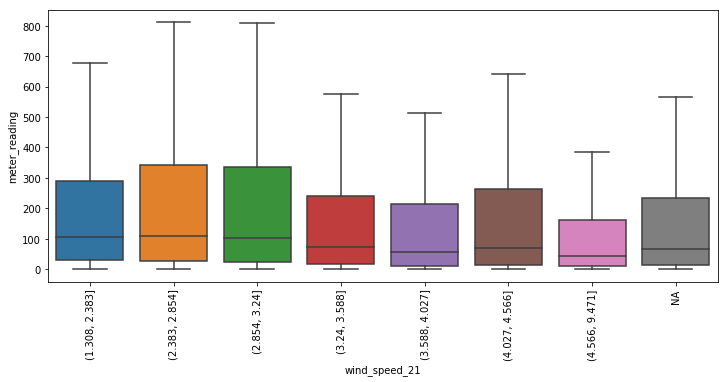

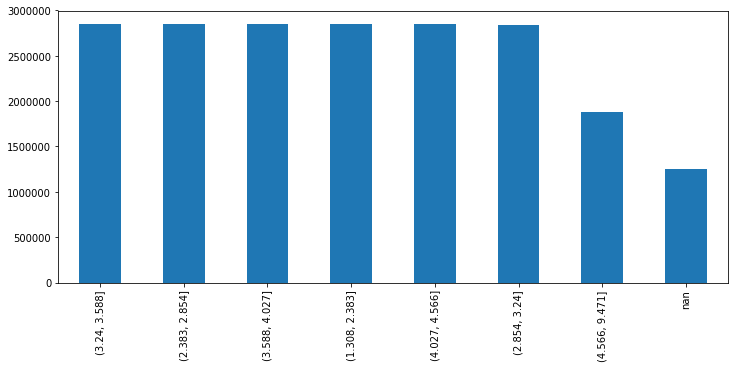

SAME DISTANCE BINNING:


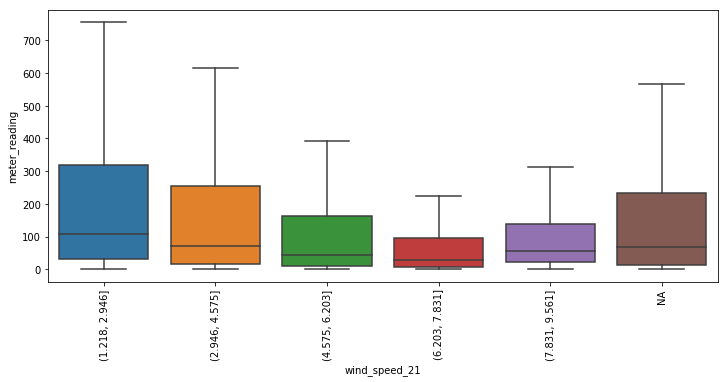

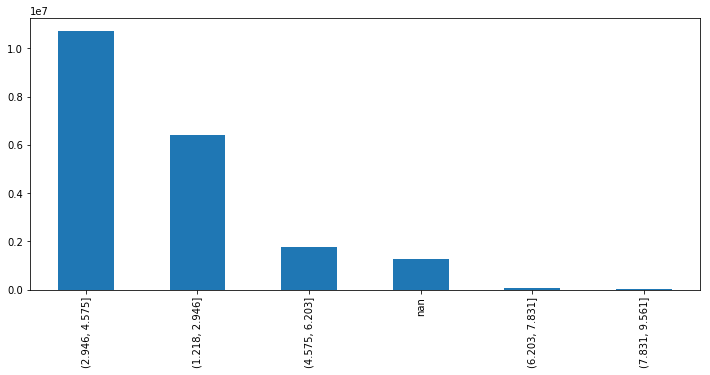

---------------------------------------------------------
---------------------------------------------------------
air_temperature_28
SAME FREQUENCY BINNING:


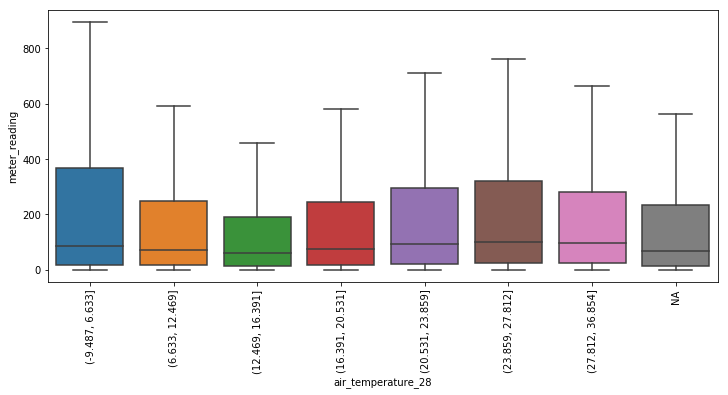

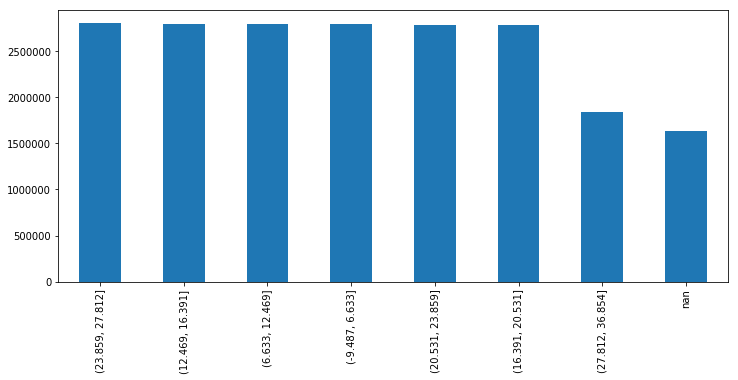

SAME DISTANCE BINNING:


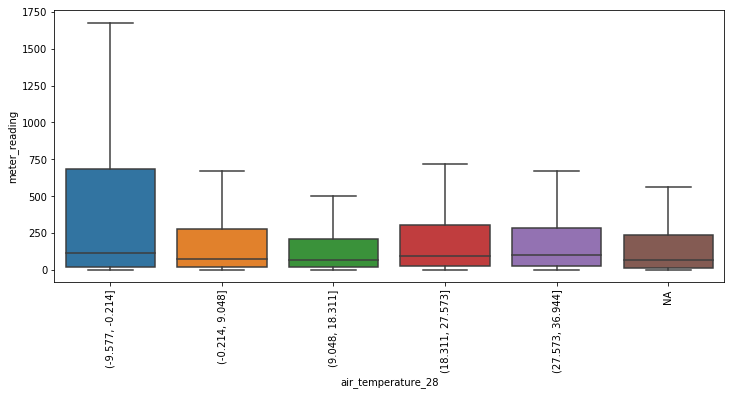

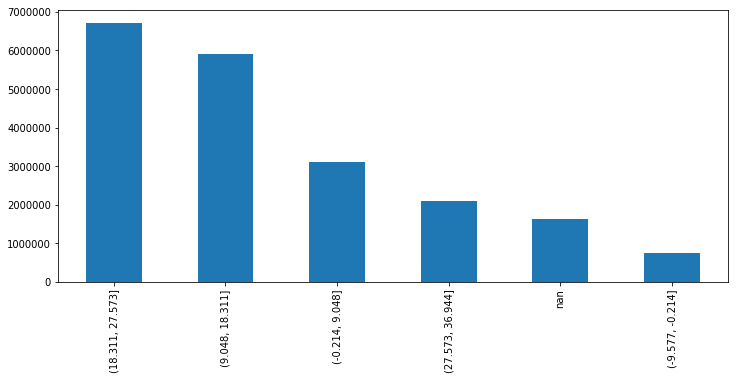

---------------------------------------------------------
---------------------------------------------------------
cloud_coverage_28
SAME FREQUENCY BINNING:


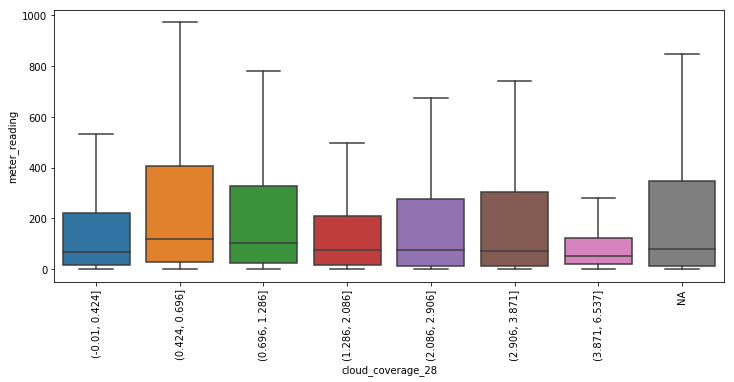

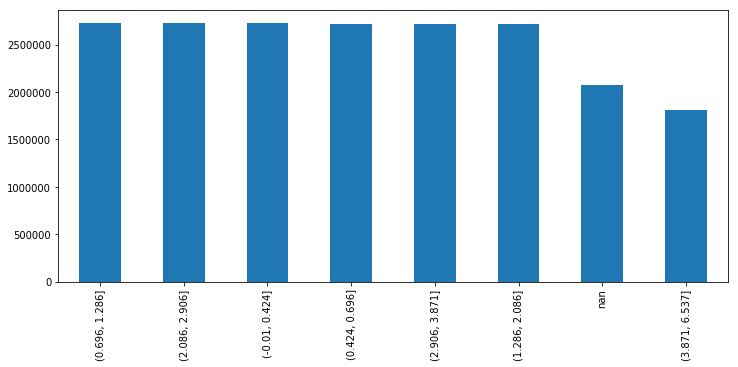

SAME DISTANCE BINNING:


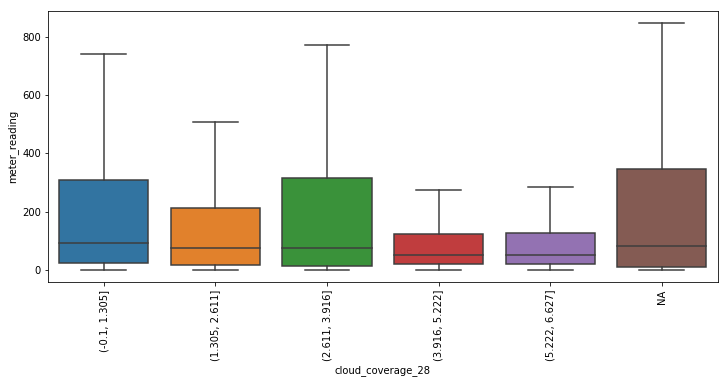

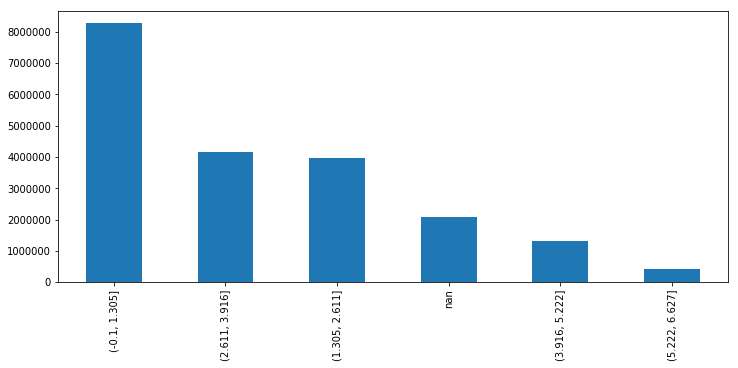

---------------------------------------------------------
---------------------------------------------------------
dew_temperature_28
SAME FREQUENCY BINNING:


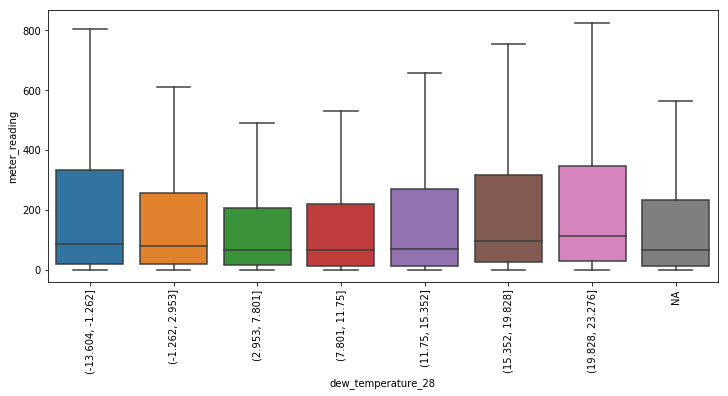

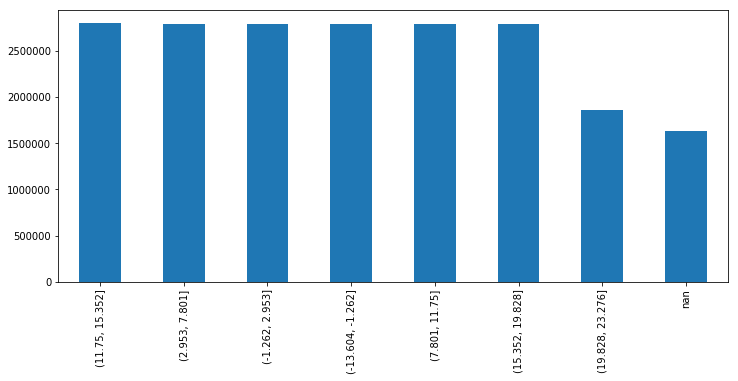

SAME DISTANCE BINNING:


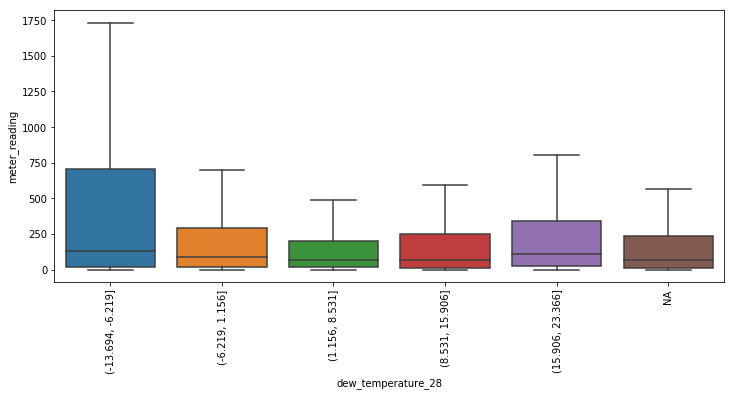

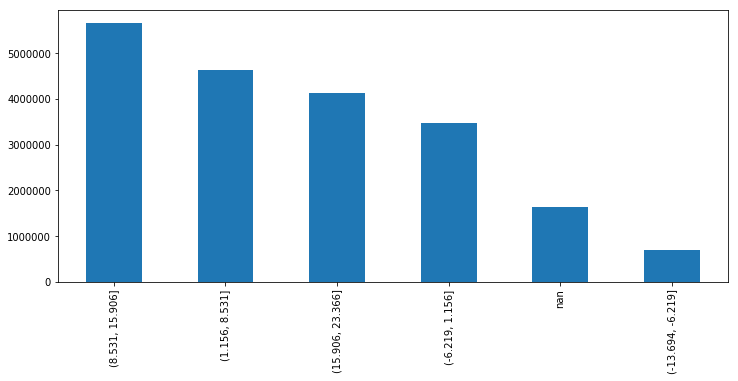

---------------------------------------------------------
---------------------------------------------------------
precip_depth_1_hr_28
SAME FREQUENCY BINNING:


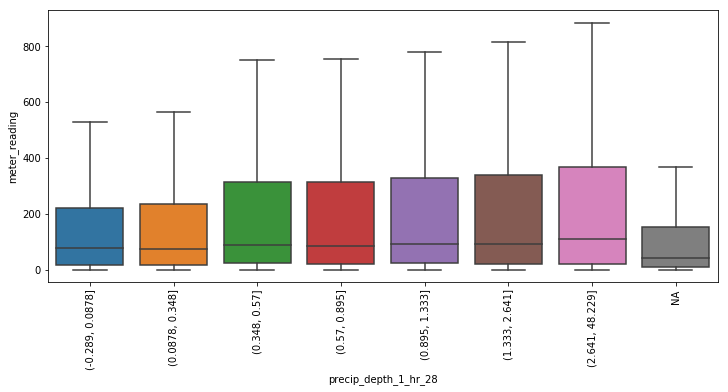

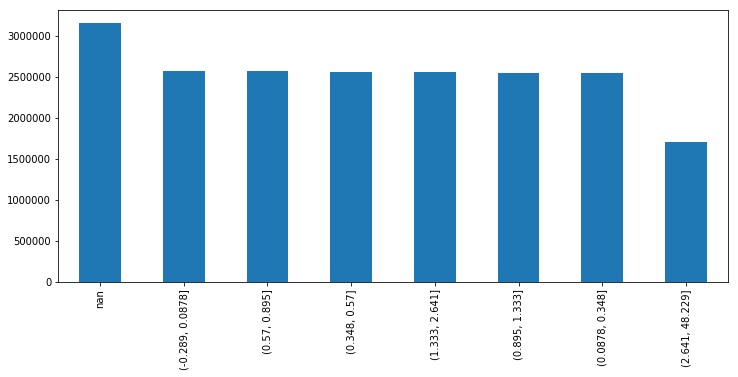

SAME DISTANCE BINNING:


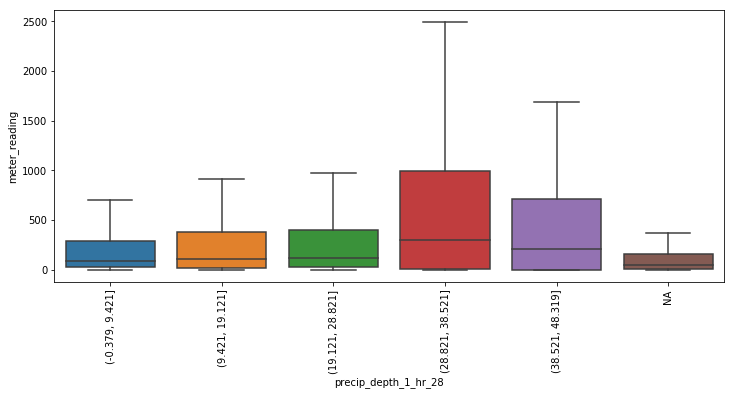

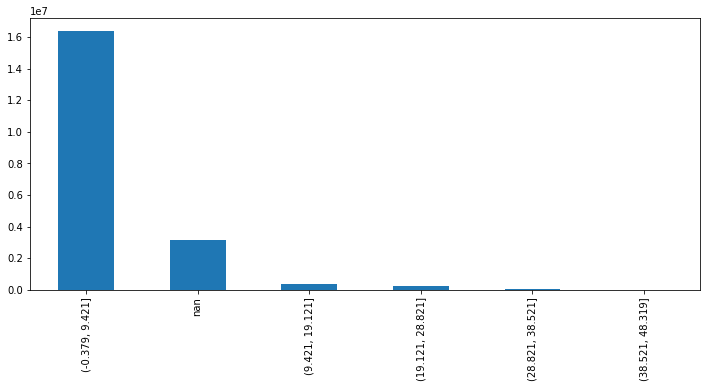

---------------------------------------------------------
---------------------------------------------------------
wind_speed_28
SAME FREQUENCY BINNING:


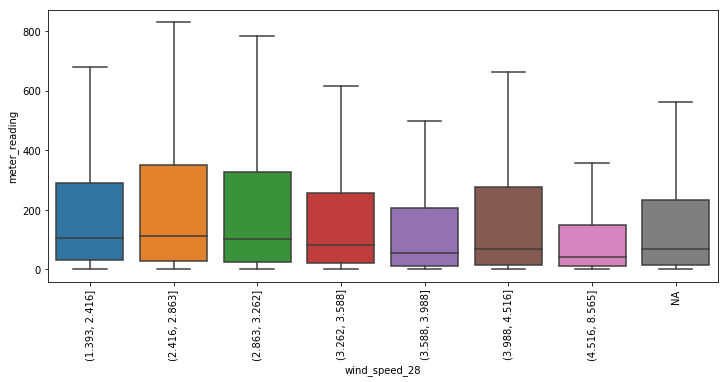

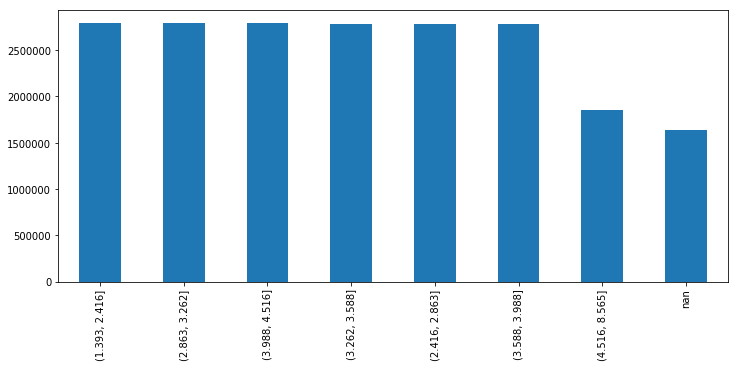

SAME DISTANCE BINNING:


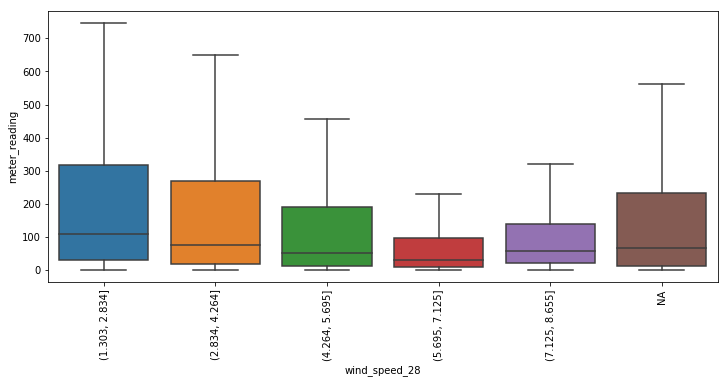

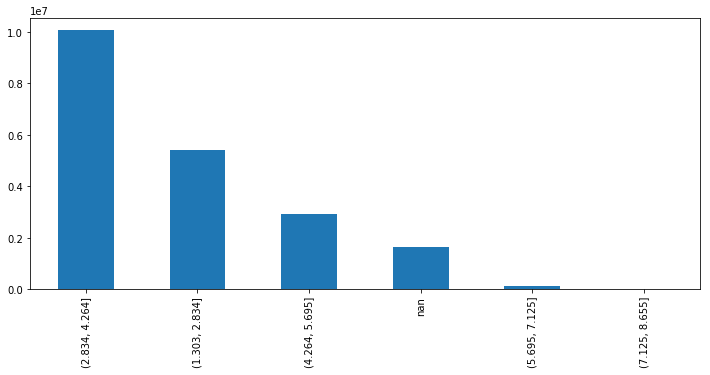

---------------------------------------------------------
---------------------------------------------------------
hour
SAME FREQUENCY BINNING:


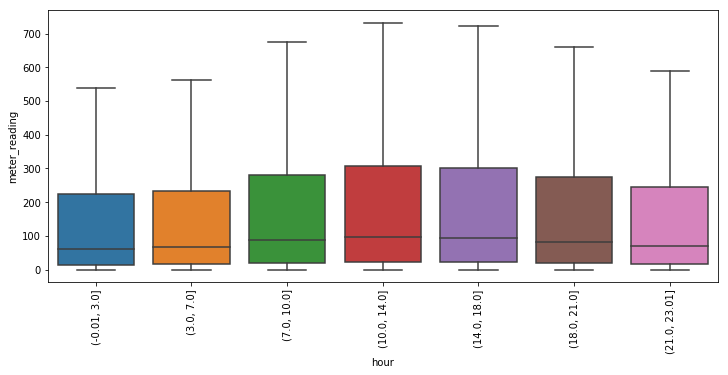

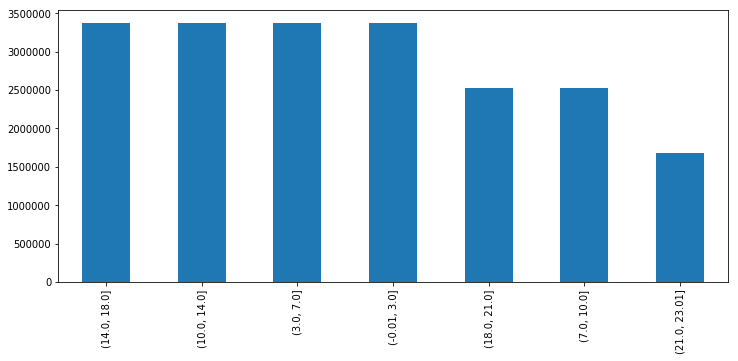

SAME DISTANCE BINNING:


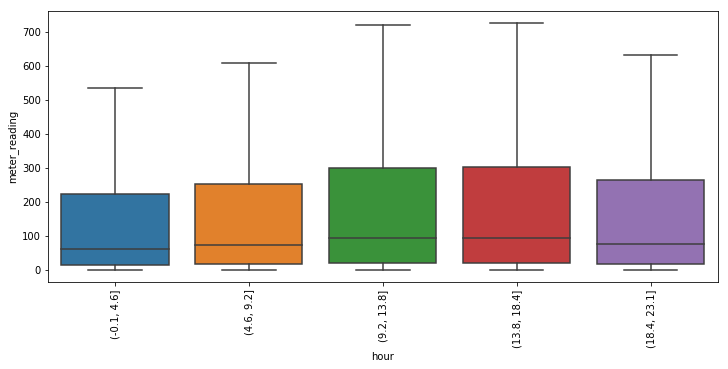

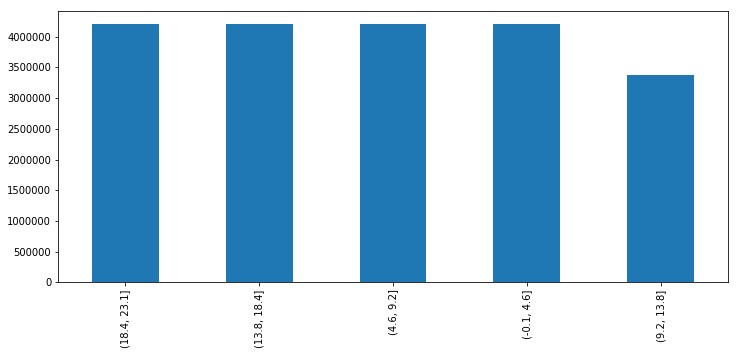

---------------------------------------------------------
---------------------------------------------------------


In [28]:
for i in num_preds:
    print(i)
    
    print('SAME FREQUENCY BINNING:')
    
    borders=[]
    for j in [15,30,45,60,75,90]:
        borders=np.append(borders,np.nanpercentile(train[i],j))
    borders=np.concatenate(([train[i].min()-0.01], borders))
    borders=np.append(borders,train[i].max()+0.01)
    borders=list(dict.fromkeys(borders))
    graph_exploration_continuous(pd.cut(train[i],borders),train['meter_reading'])
    
    plt.figure(figsize=(12,5))
    pd.cut(train[i],borders).value_counts(dropna=False).plot(kind='bar')
    plt.show()
    
    
    print('SAME DISTANCE BINNING:')
    
    borders=[]
    rg=train[i].max()-train[i].min()
    borders=[train[i].min()-0.1,train[i].min()+0.2*rg,train[i].min()+0.4*rg,train[i].min()+0.6*rg,train[i].min()+0.8*rg,train[i].max()+0.1]        
    borders=list(dict.fromkeys(borders))
    graph_exploration_continuous(pd.cut(train[i],borders),train['meter_reading'])
    
    plt.figure(figsize=(12,5))
    pd.cut(train[i],borders).value_counts(dropna=False).plot(kind='bar')
    plt.show()
    
    print('---------------------------------------------------------') 
    print('---------------------------------------------------------')

In [19]:
target=np.log1p(train['meter_reading'])
del train['meter_reading'], train['timestamp'], test['timestamp'], train['site_rownum'], test['site_rownum'], test['row_id']
gc.collect()

272

In [20]:
importance_df,valid_predictions=LGB_CV(train_set=train,train_target=target,valid_set=test,valid_target='',n_folds=4,ret_valid=1,cat_var='',use_timesplit=False)

C:\Users\lubor.pacak\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.08106
[400]	valid_0's rmse: 1.06812
[600]	valid_0's rmse: 1.05915
Early stopping, best iteration is:
[647]	valid_0's rmse: 1.05725


C:\Users\lubor.pacak\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.07232
[400]	valid_0's rmse: 1.05898
[600]	valid_0's rmse: 1.05202
[800]	valid_0's rmse: 1.04959
[1000]	valid_0's rmse: 1.04843
[1200]	valid_0's rmse: 1.04709
Early stopping, best iteration is:
[1163]	valid_0's rmse: 1.04687


C:\Users\lubor.pacak\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.08736
Early stopping, best iteration is:
[246]	valid_0's rmse: 1.07643


C:\Users\lubor.pacak\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 1.17349
[400]	valid_0's rmse: 1.17622
Early stopping, best iteration is:
[312]	valid_0's rmse: 1.17064

 RESULTS: 

Number of observations in train sets is: 14902491
Number of observations in test sets is: 4967497
Average gini on train set:
Average gini on test set:


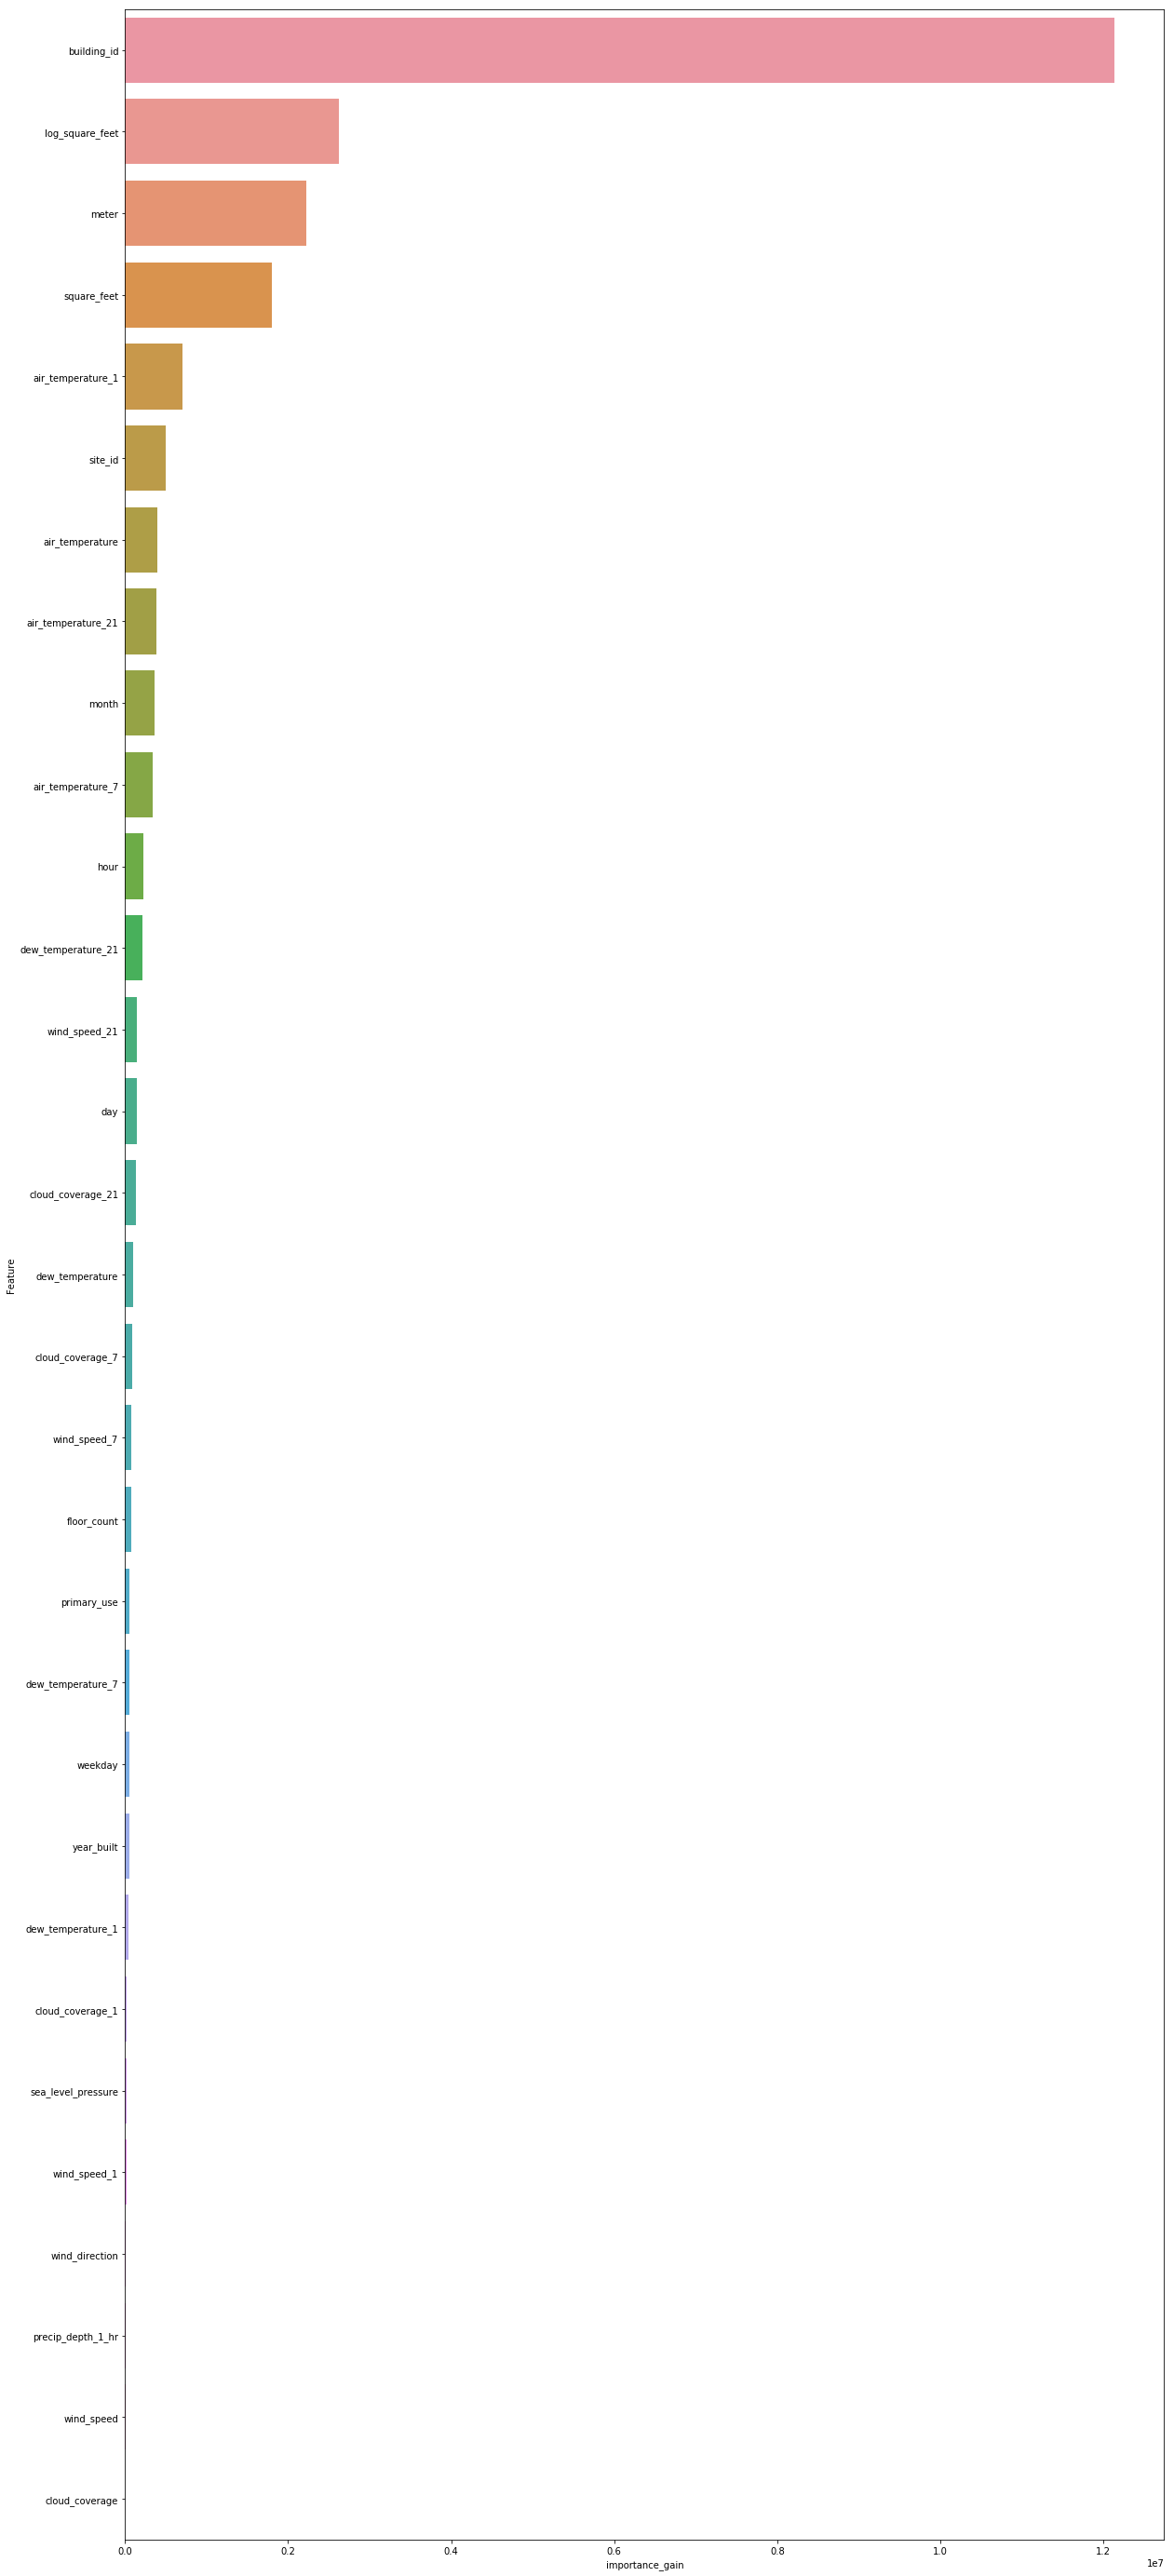

In [21]:
plot_imp(importance_df,'importance_gain',ret=False,n_predictors=100)

In [22]:
valid_predictions

array([ 56.70831279,  28.62263632,   8.30850452, ...,   5.49730002,
       104.810077  ,   3.16818332])

(array([4.1361412e+07, 1.9472400e+05, 4.6269000e+04, 2.4063000e+04,
        1.9136000e+04, 1.5952000e+04, 1.0321000e+04, 7.2510000e+03,
        4.5910000e+03, 3.1570000e+03, 2.1360000e+03, 1.5410000e+03,
        1.0420000e+03, 8.7400000e+02, 5.4200000e+02, 3.4800000e+02,
        2.2500000e+02, 1.5500000e+02, 1.0500000e+02, 8.6000000e+01,
        8.4000000e+01, 3.6000000e+01, 4.7000000e+01, 5.1000000e+01,
        3.7000000e+01, 3.9000000e+01, 2.8000000e+01, 3.5000000e+01,
        4.2000000e+01, 4.6000000e+01, 3.5000000e+01, 3.2000000e+01,
        5.0000000e+01, 6.3000000e+01, 5.0000000e+01, 3.5000000e+01,
        4.6000000e+01, 2.4000000e+01, 3.9000000e+01, 4.0000000e+01,
        4.9000000e+01, 4.0000000e+01, 3.6000000e+01, 6.6000000e+01,
        5.9000000e+01, 5.8000000e+01, 7.0000000e+01, 6.1000000e+01,
        5.0000000e+01, 6.1000000e+01, 4.4000000e+01, 4.4000000e+01,
        4.0000000e+01, 3.4000000e+01, 4.1000000e+01, 3.6000000e+01,
        4.5000000e+01, 4.6000000e+01, 4.4000000e

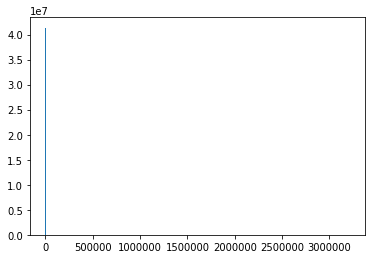

In [26]:
plt.hist(valid_predictions,1000)

(array([2.0211892e+07, 4.1000000e+02, 5.6000000e+02, 1.5300000e+02,
        3.0000000e+01, 1.9000000e+01, 3.1000000e+01, 3.6000000e+01,
        3.5000000e+01, 3.2000000e+01, 3.9000000e+01, 4.0000000e+01,
        4.2000000e+01, 4.8000000e+01, 2.8000000e+01, 3.4000000e+01,
        2.4000000e+01, 2.6000000e+01, 2.8000000e+01, 1.3000000e+01,
        1.9000000e+01, 1.6000000e+01, 1.8000000e+01, 2.8000000e+01,
        4.2000000e+01, 4.8000000e+01, 5.1000000e+01, 7.2000000e+01,
        9.5000000e+01, 8.9000000e+01, 1.1300000e+02, 1.3100000e+02,
        7.7000000e+01, 4.7000000e+01, 5.4000000e+01, 3.0000000e+01,
        3.2000000e+01, 2.2000000e+01, 2.0000000e+01, 1.2000000e+01,
        1.5000000e+01, 8.0000000e+00, 2.0000000e+01, 4.0000000e+00,
        1.1000000e+01, 1.7000000e+01, 6.0000000e+00, 1.1000000e+01,
        8.0000000e+00, 1.7000000e+01, 6.0000000e+00, 8.0000000e+00,
        7.0000000e+00, 5.0000000e+00, 8.0000000e+00, 6.0000000e+00,
        1.1000000e+01, 8.0000000e+00, 8.0000000e

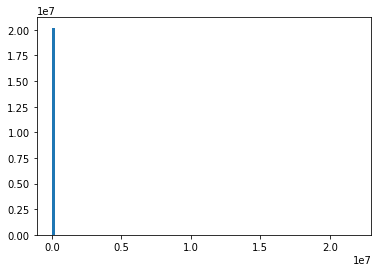

In [39]:
plt.hist(np.expm1(target),100)

In [41]:
valid_predictions

array([ 56.70831279,  28.62263632,   8.30850452, ...,   5.49730002,
       104.810077  ,   3.16818332])

In [22]:
predikce=pd.read_csv("test.csv")
predikce=predikce[['row_id']]
gc.collect()
predikce['meter_reading']=valid_predictions
predikce[predikce['meter_reading']<0]['meter_reading']=0
predikce.to_csv('pred1.csv', index=False)

C:\Users\lubor.pacak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [49]:
predikce.shape

(41697600, 2)